In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
kappa = pd.read_csv("../data/CSpine/CSV datasets/kappa.csv")
medicalhistory = pd.read_csv("../data/CSpine/CSV datasets/medicalhistory.csv")
injurymechanism = pd.read_csv("../data/CSpine/CSV datasets/injurymechanism.csv")

   SITE  CaseID ControlType  StudySubjectID PtAmbulatoryPriorArrival  \
0     1  110002        case          110002                        N   
1     1  110015        case          110015                        Y   
2     1  110017        case          110017                        N   
3     1  110012         ems          120042                        N   
4     1  110019         ems          120043                        N   

  HxLOCSite SectionGCSAvailable TotalGCSAvailable  TotalGCSManual  GCSEye  \
0         N                   Y               NaN             NaN     4.0   
1         N                  ND                ND             NaN     NaN   
2         N                   Y               NaN             NaN     4.0   
3         N                   Y               NaN             NaN     4.0   
4         N                   Y               NaN             NaN     4.0   

   ...  MVCSpeed  PassRestraint  OMTSpeed Assault ChildAbuse  \
0  ...       NaN            NaN       Na

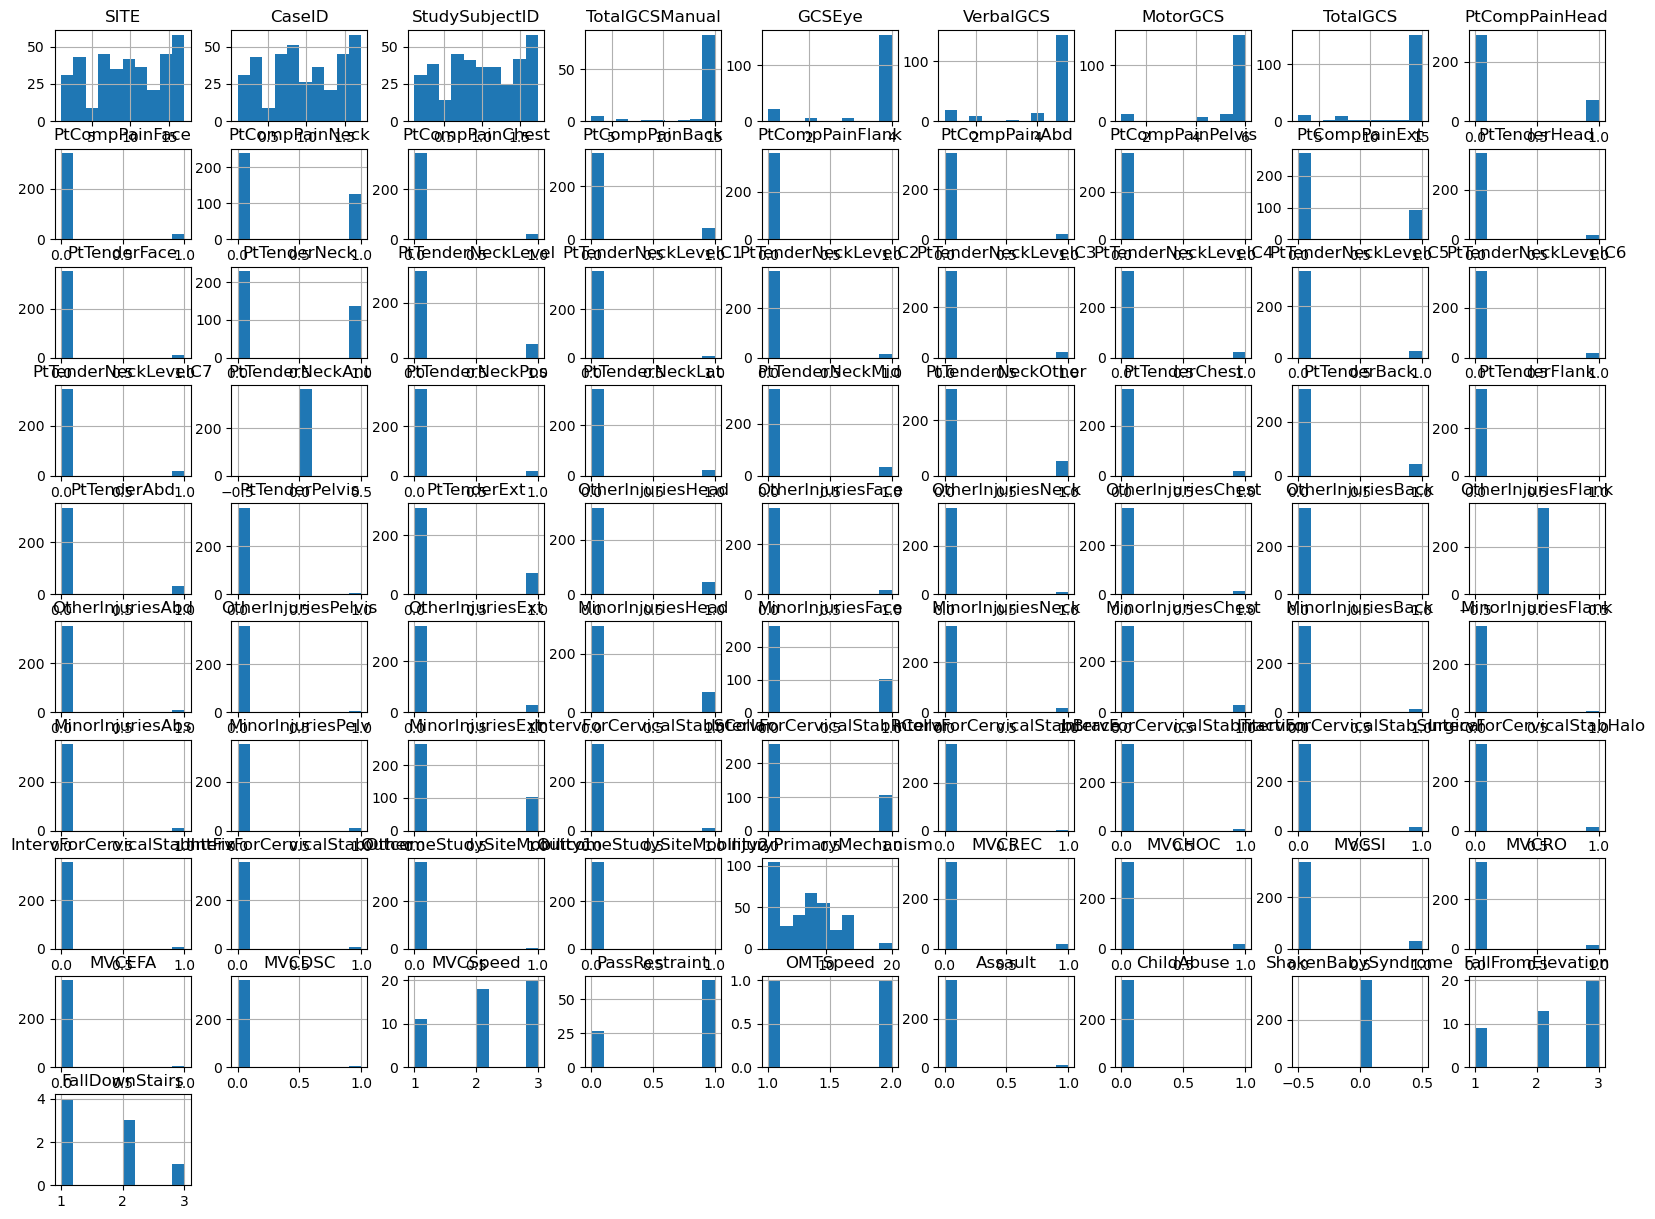

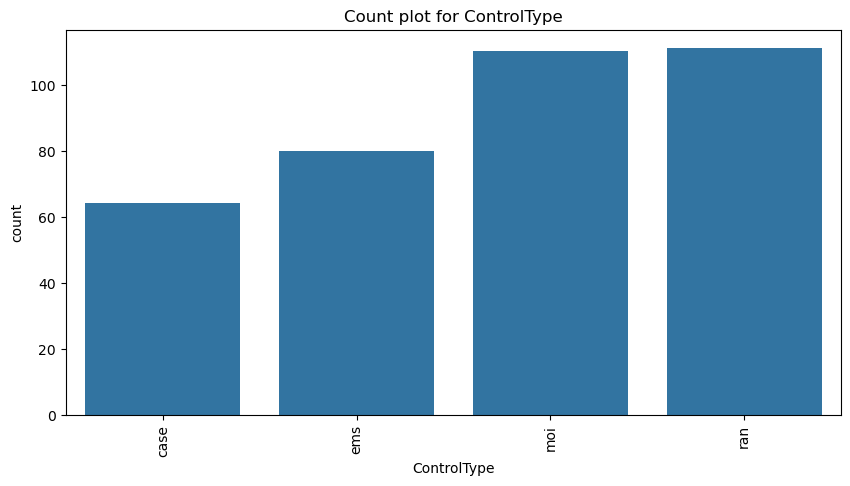

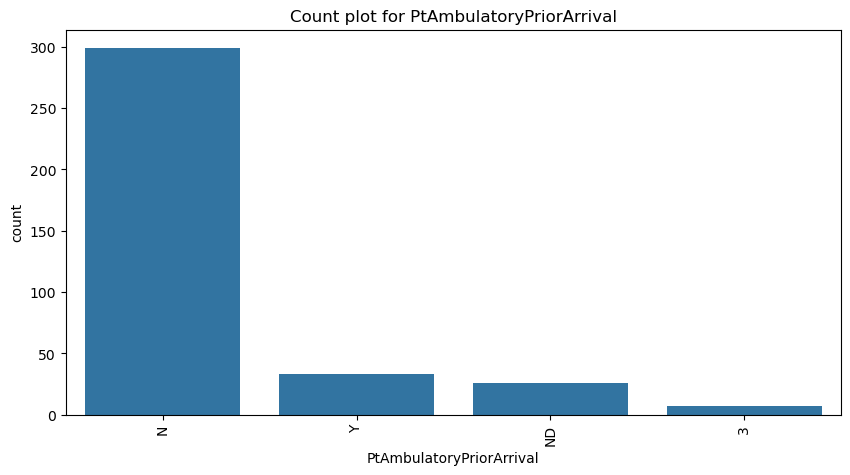

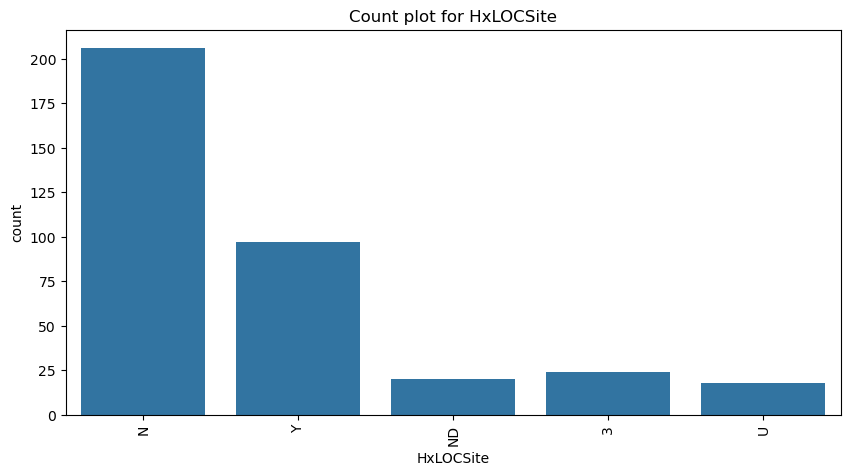

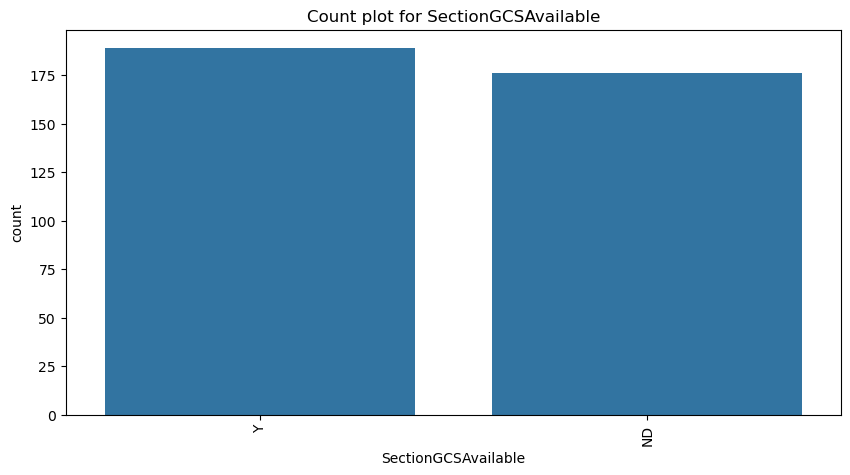

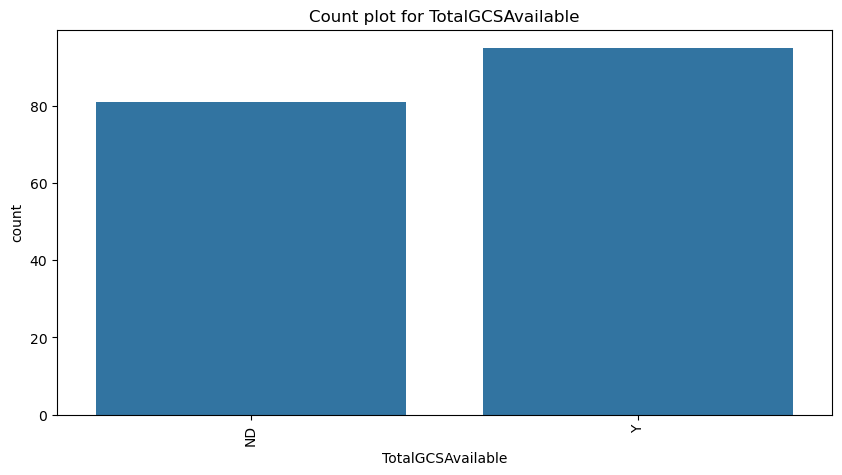

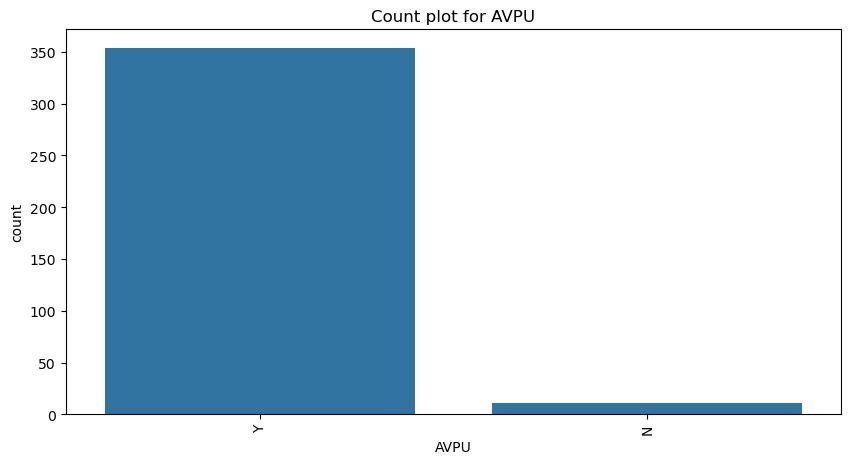

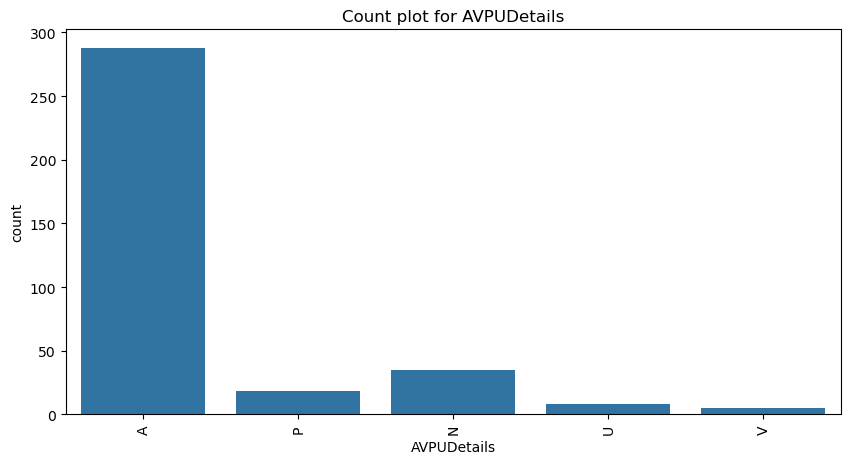

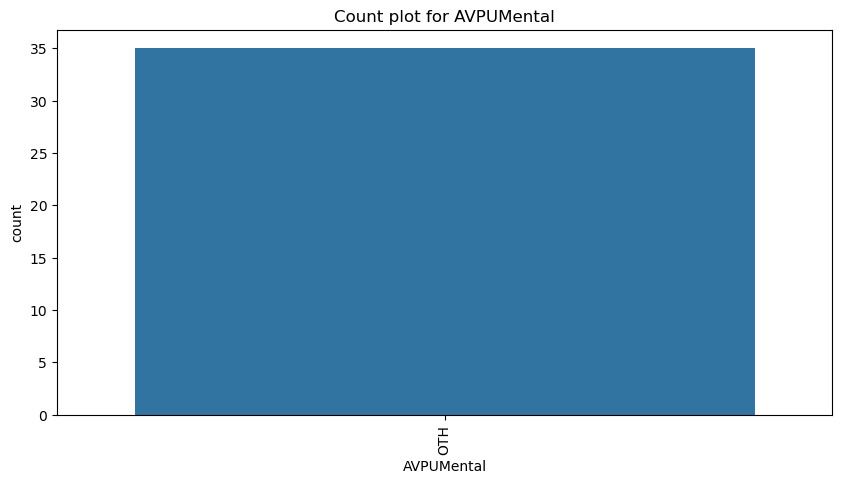

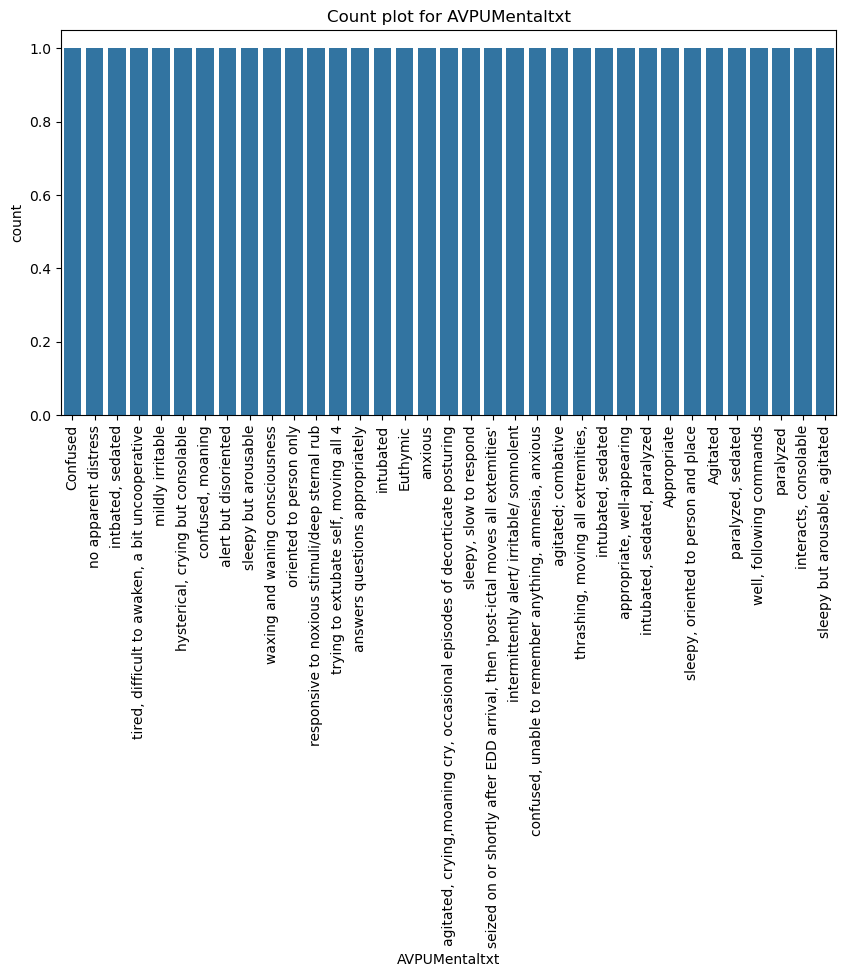

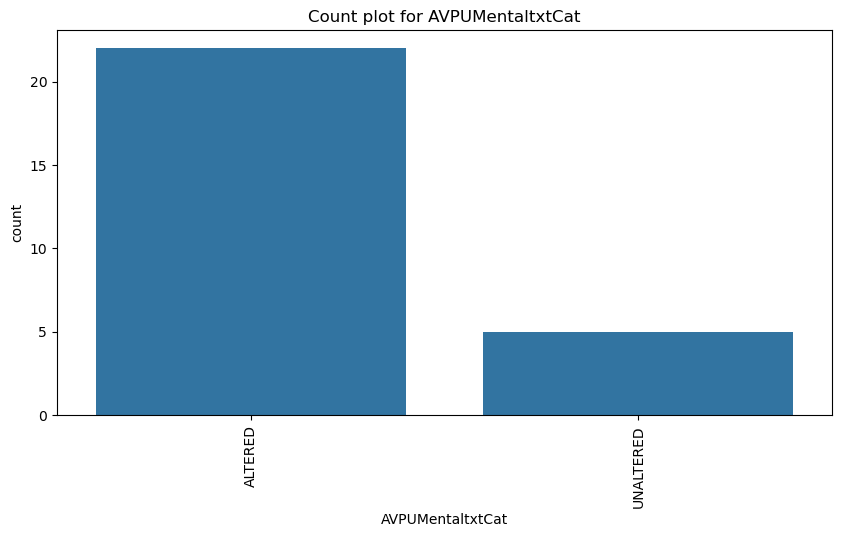

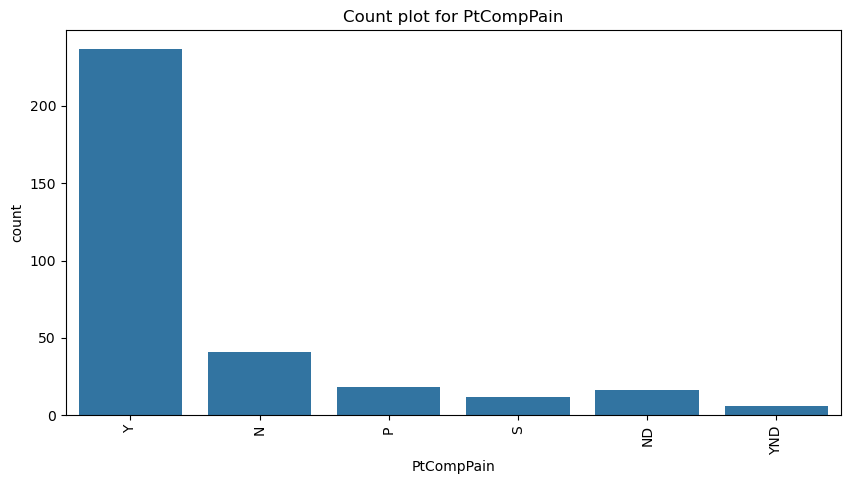

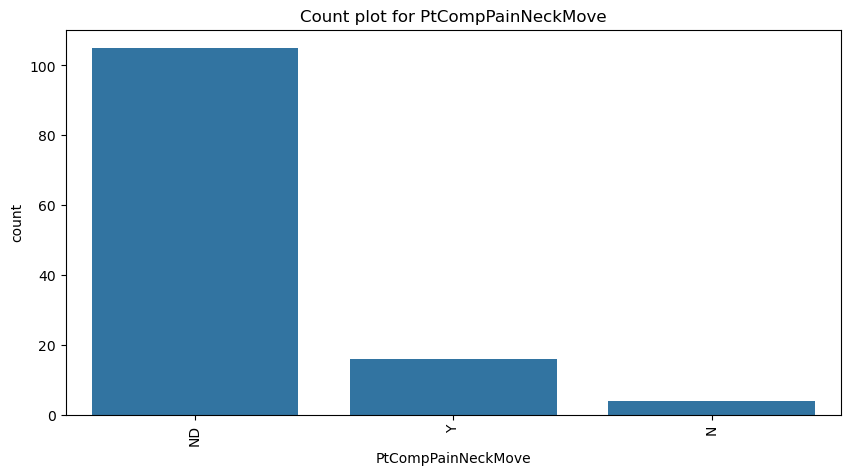

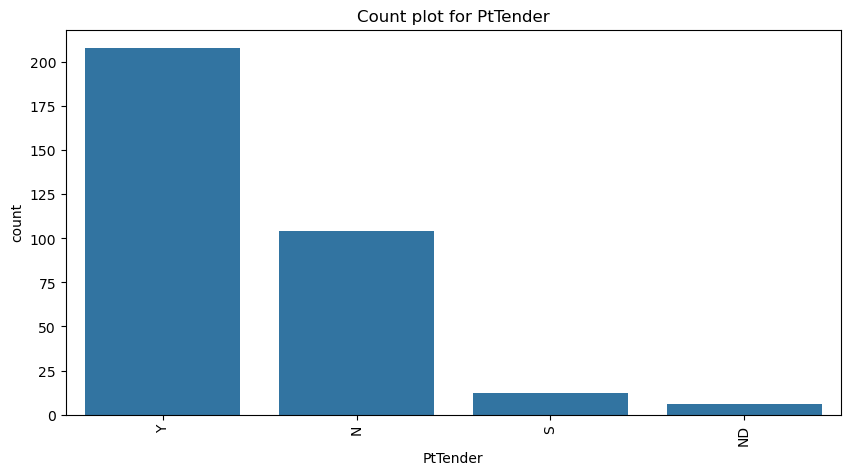

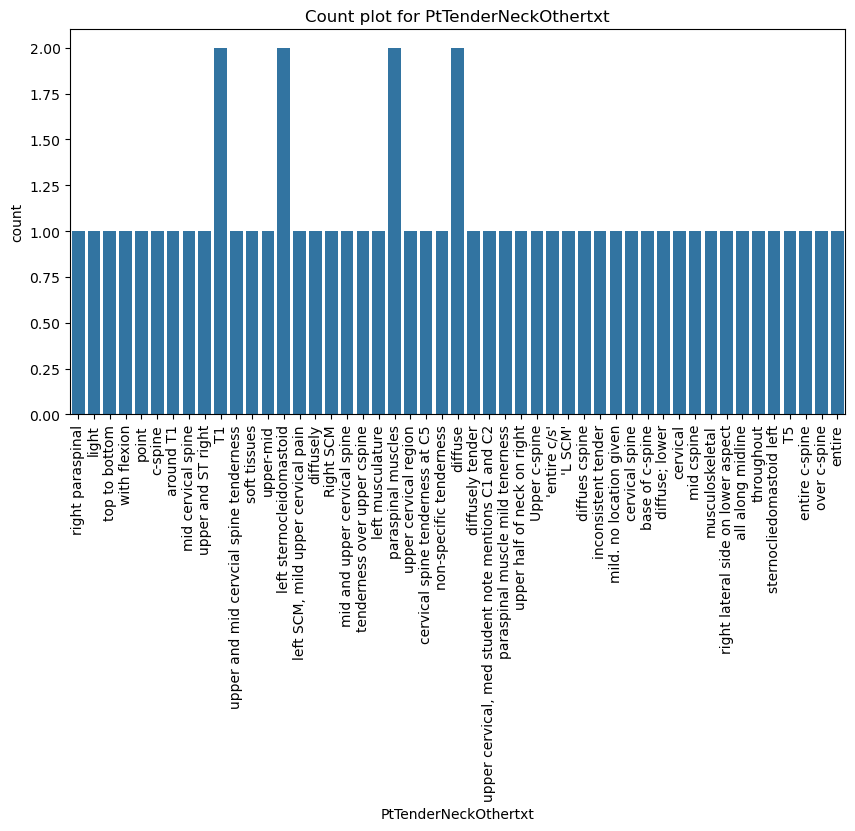

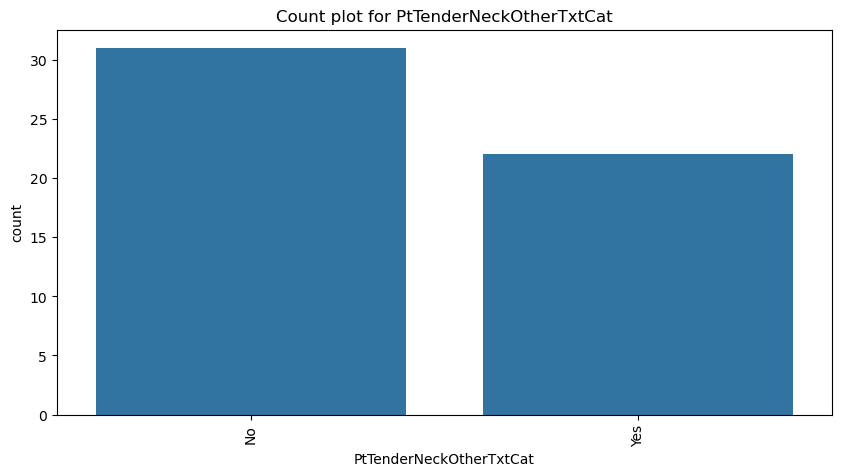

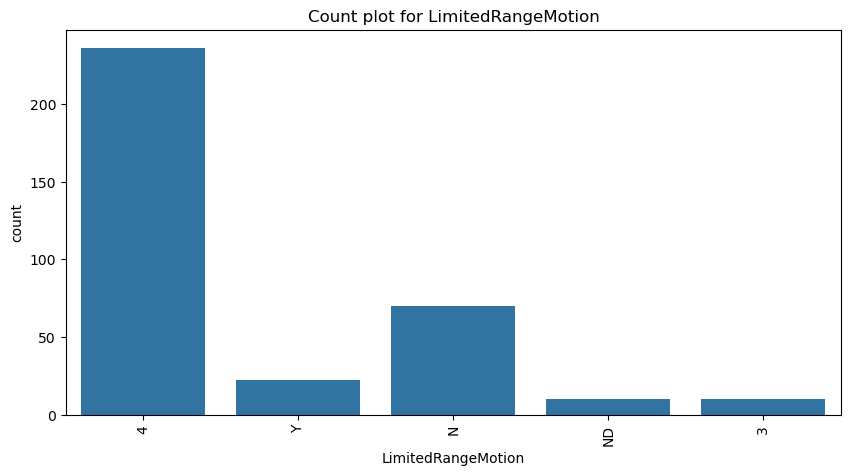

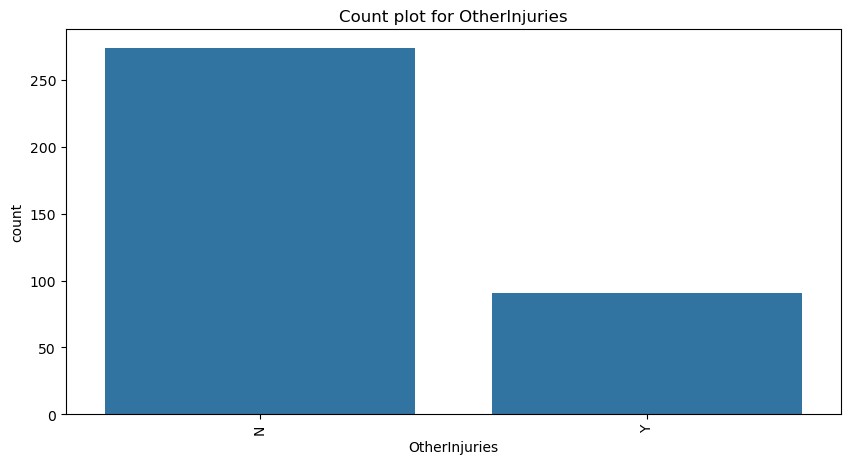

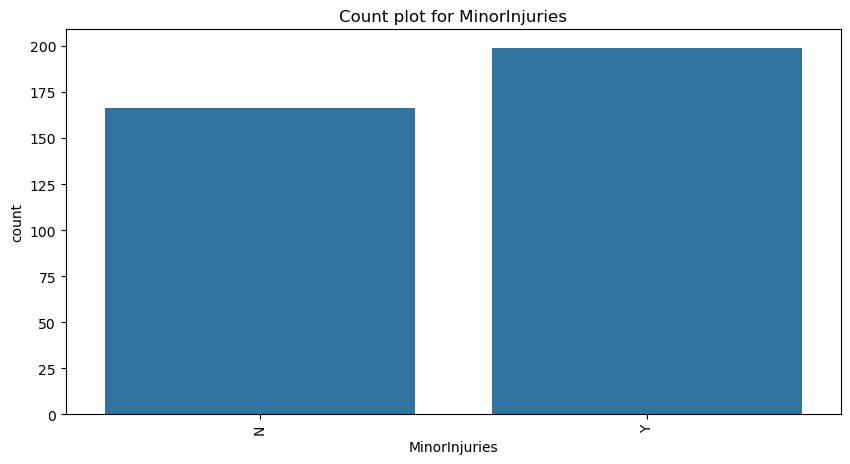

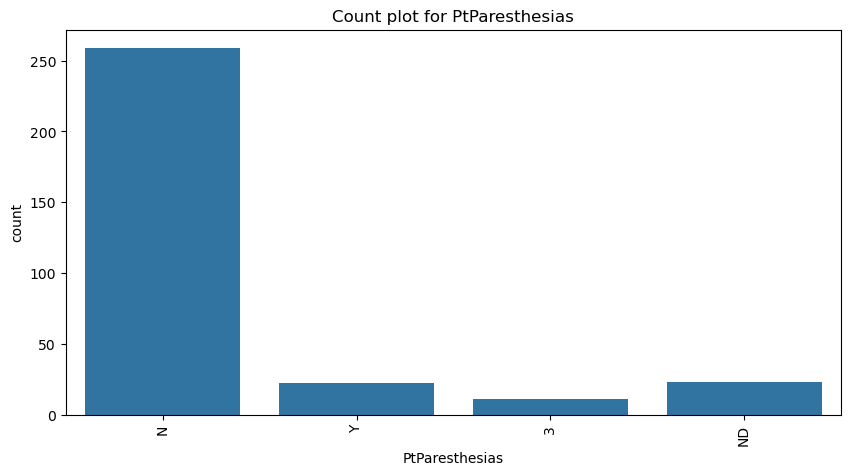

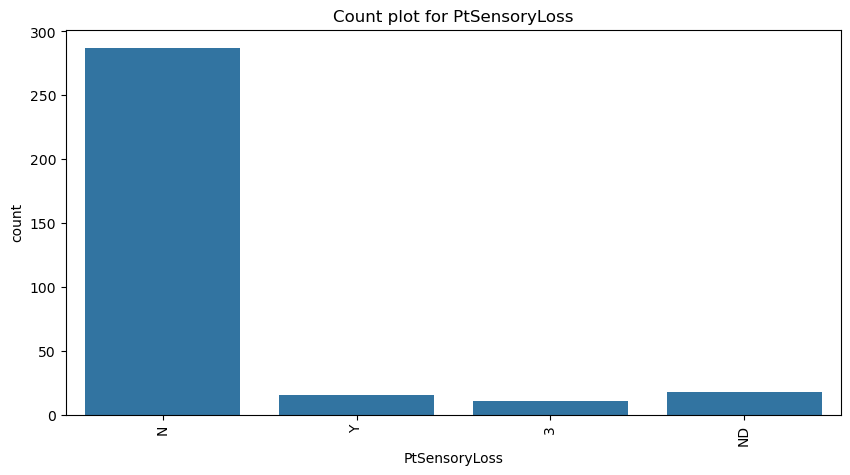

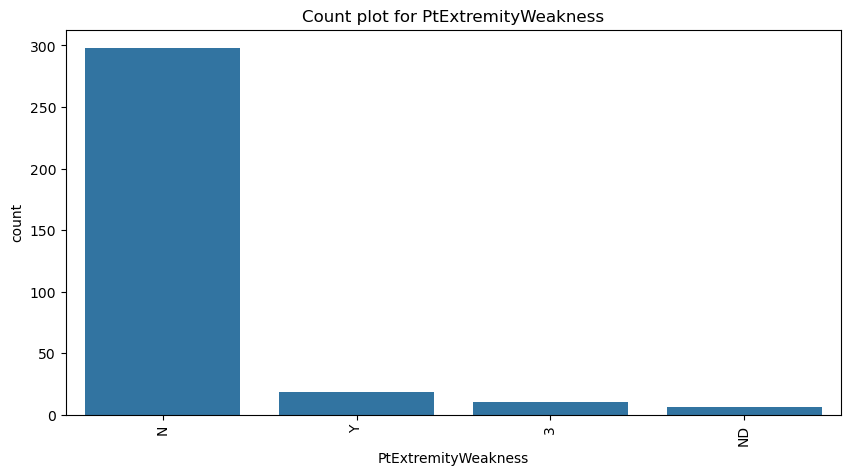

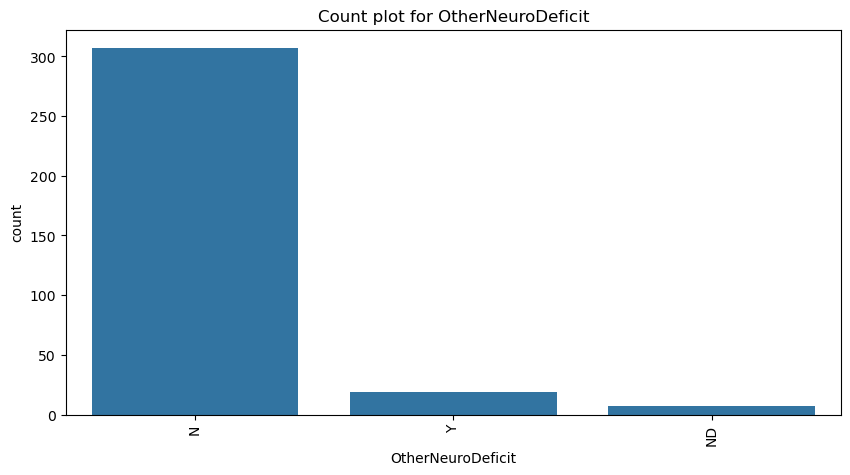

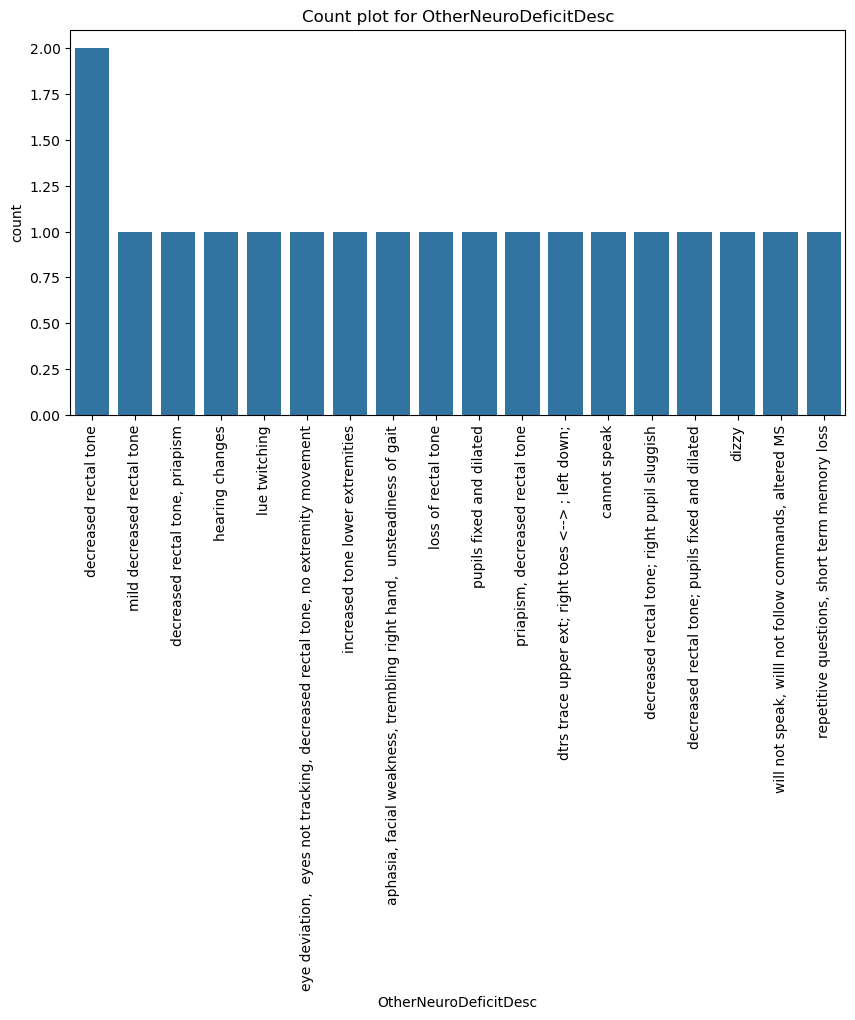

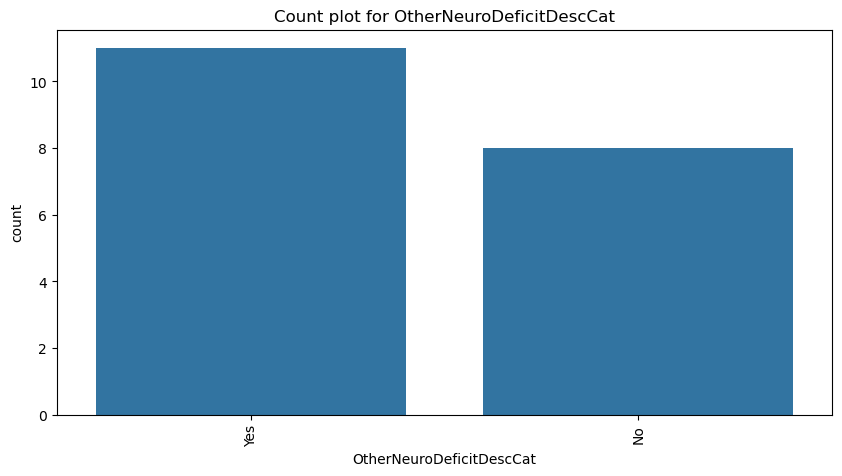

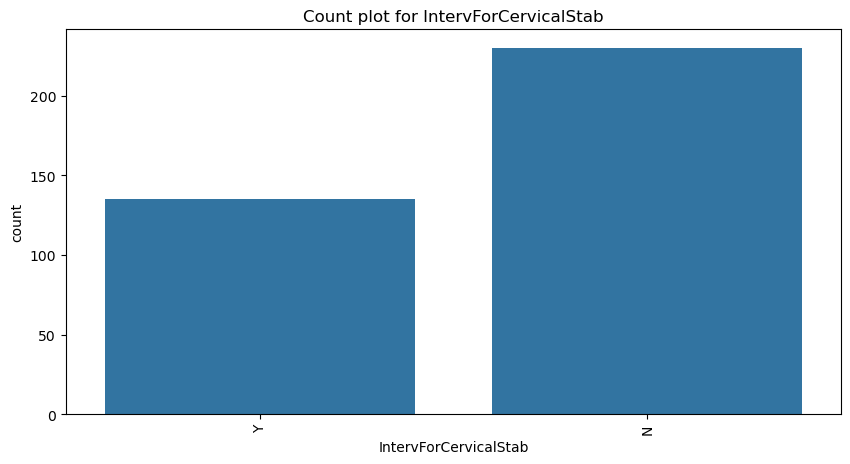

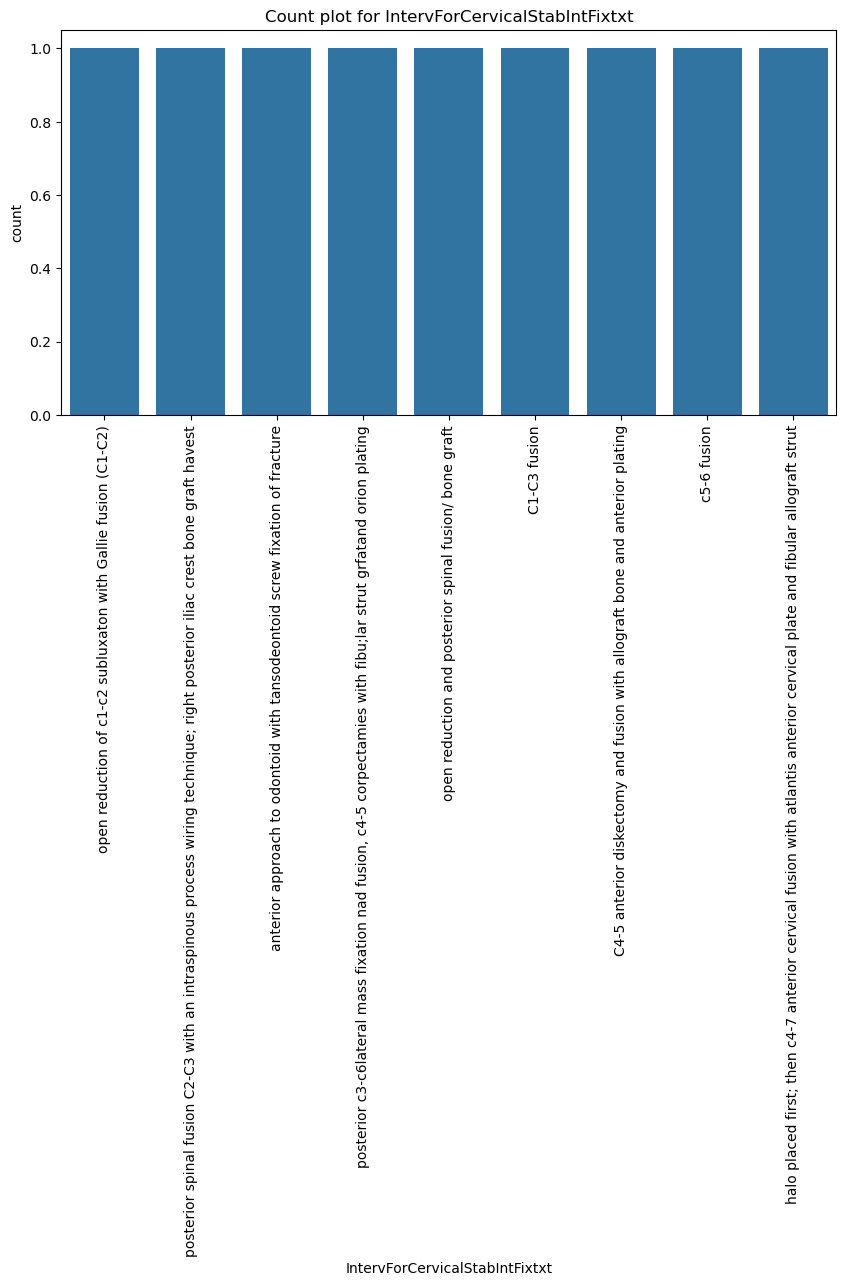

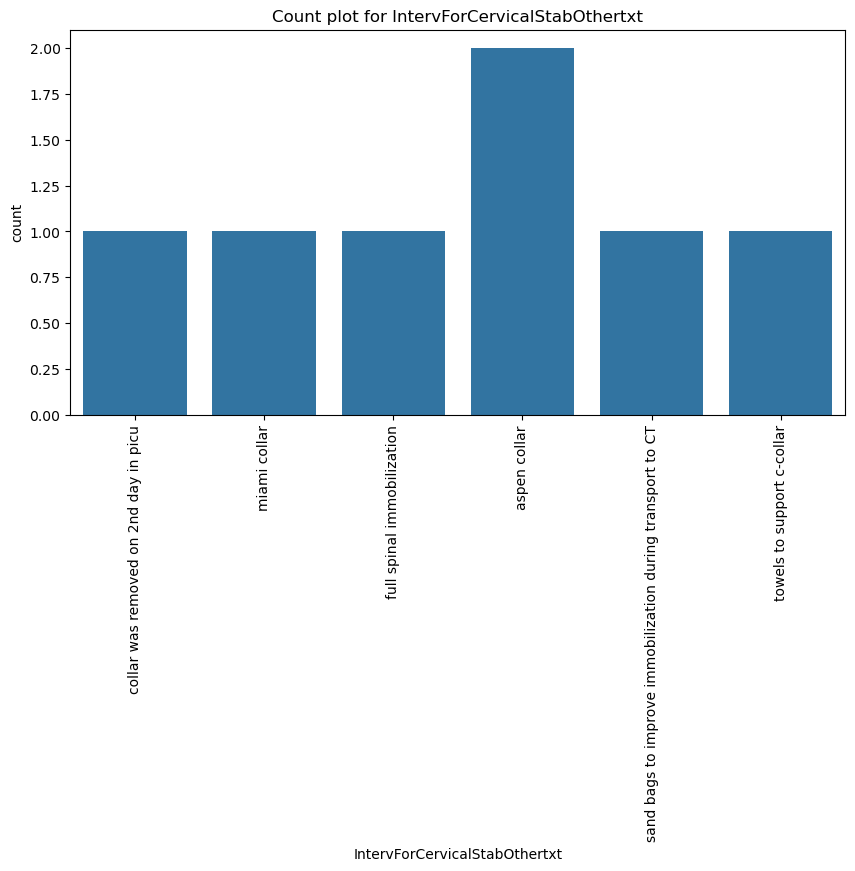

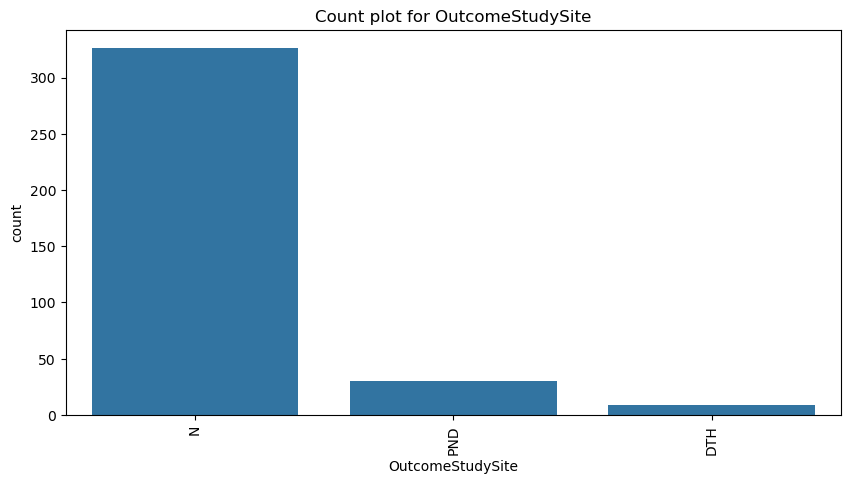

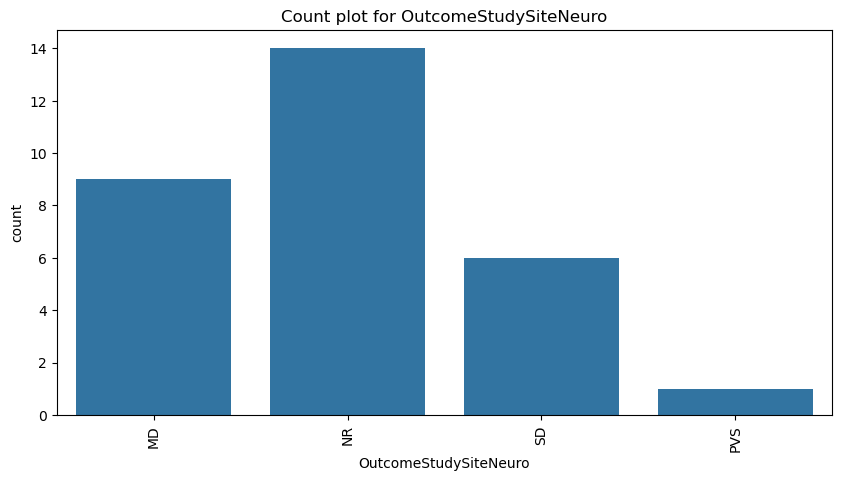

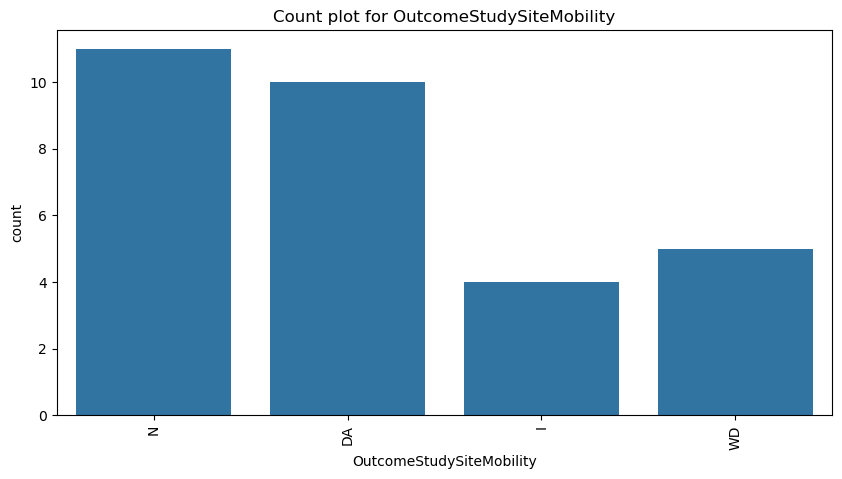

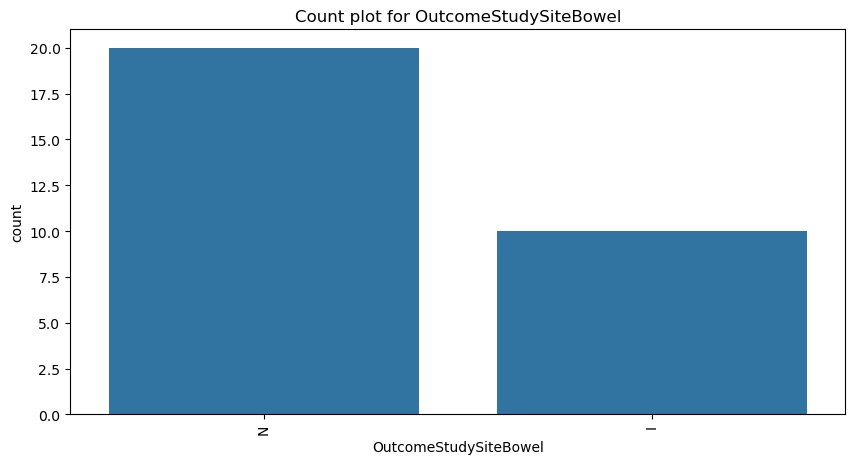

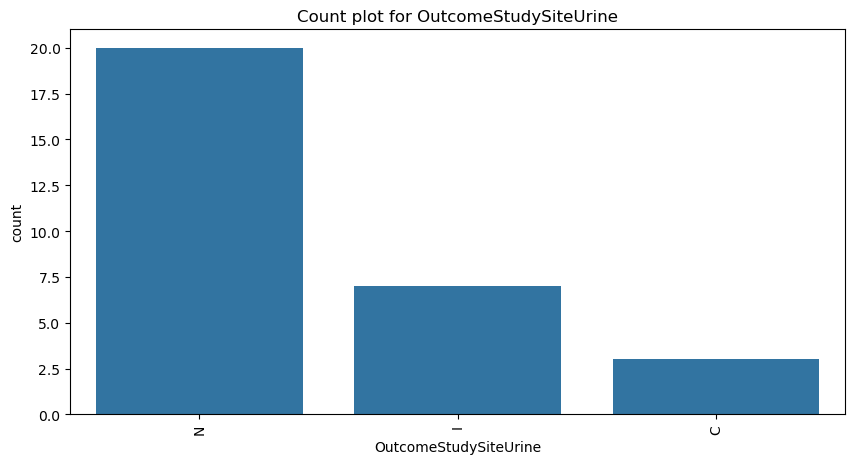

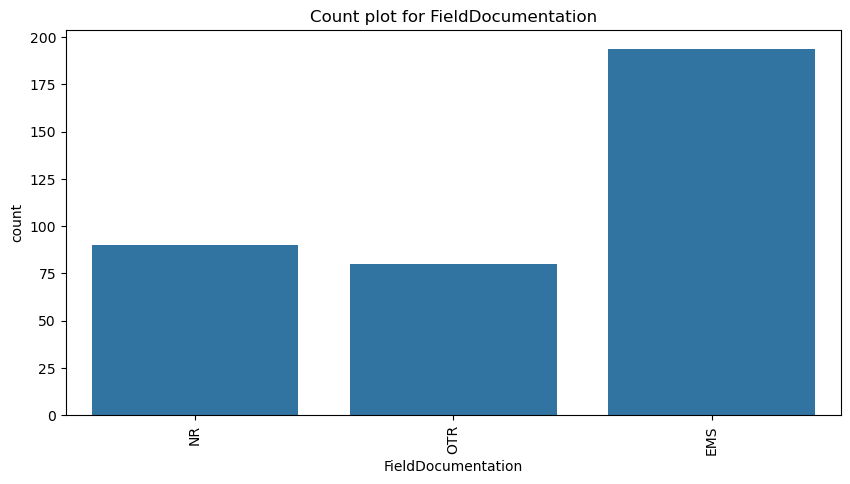

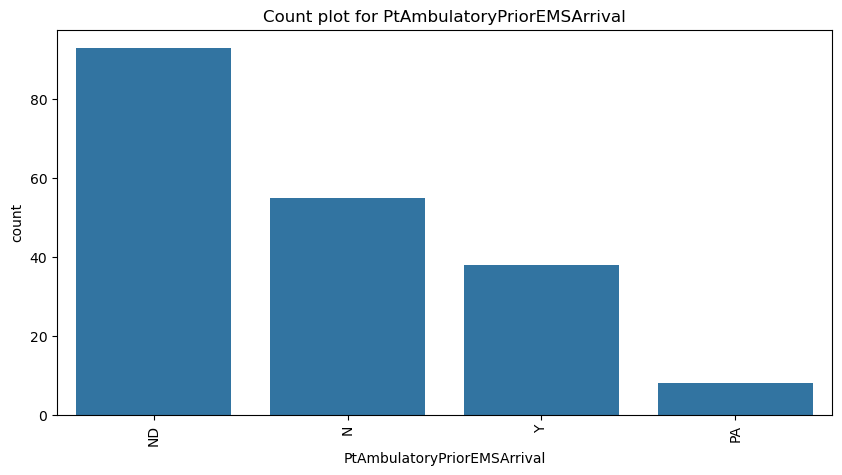

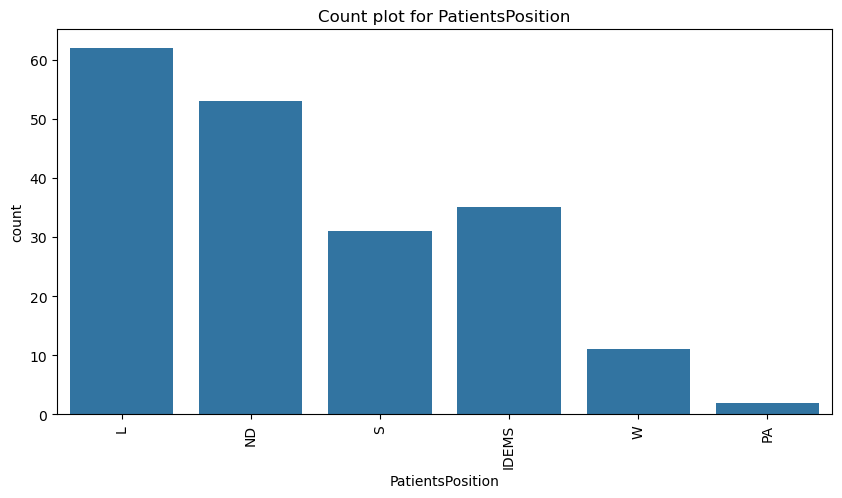

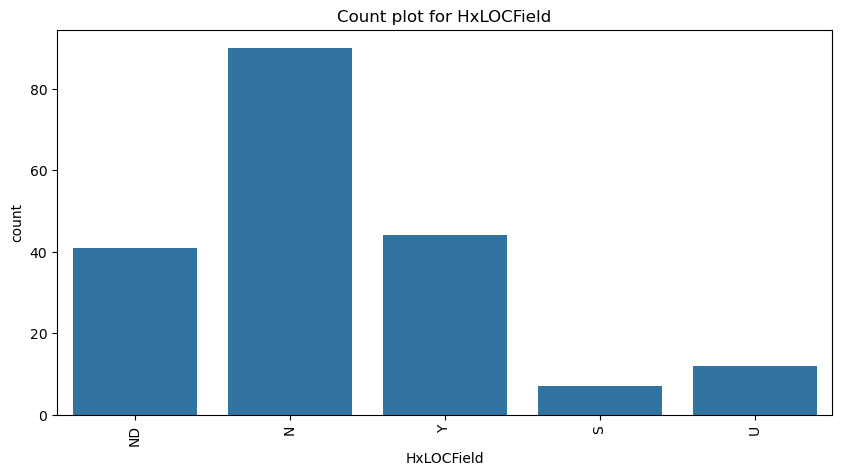

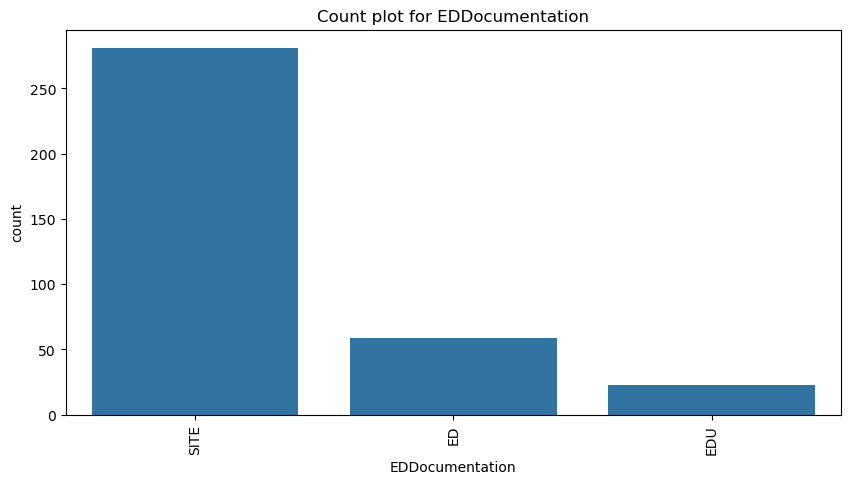

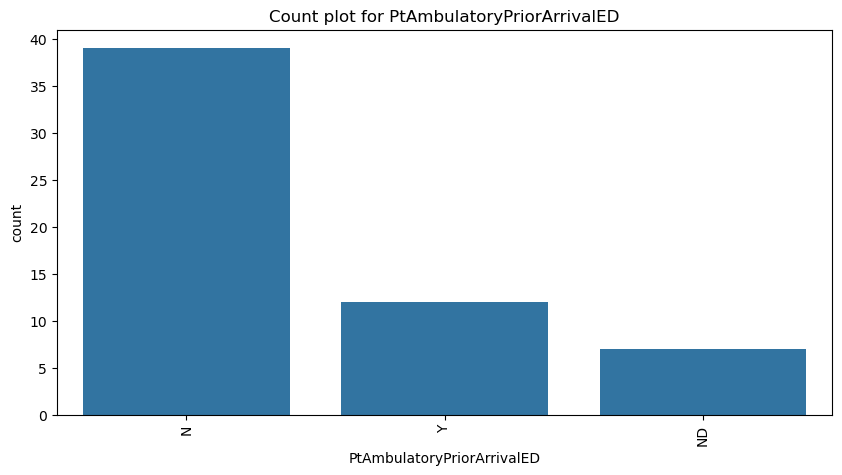

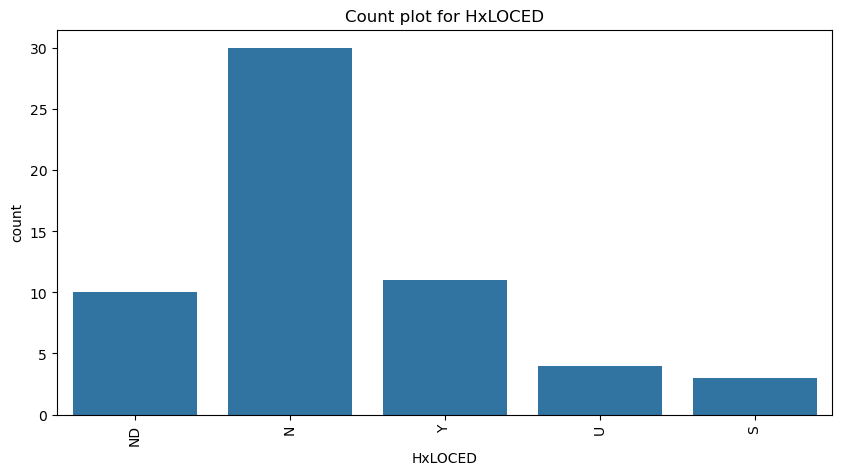

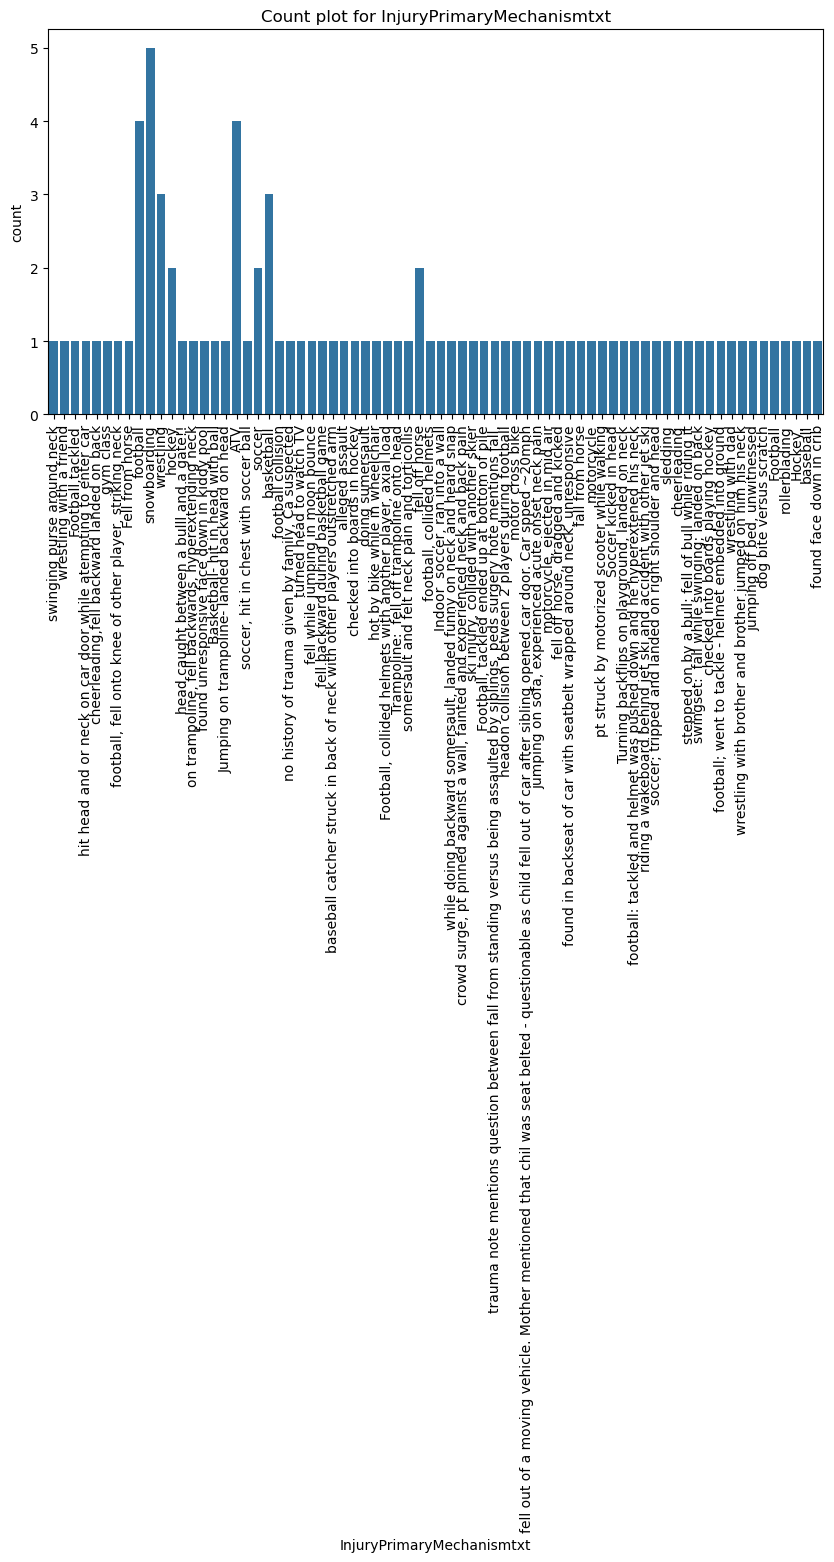

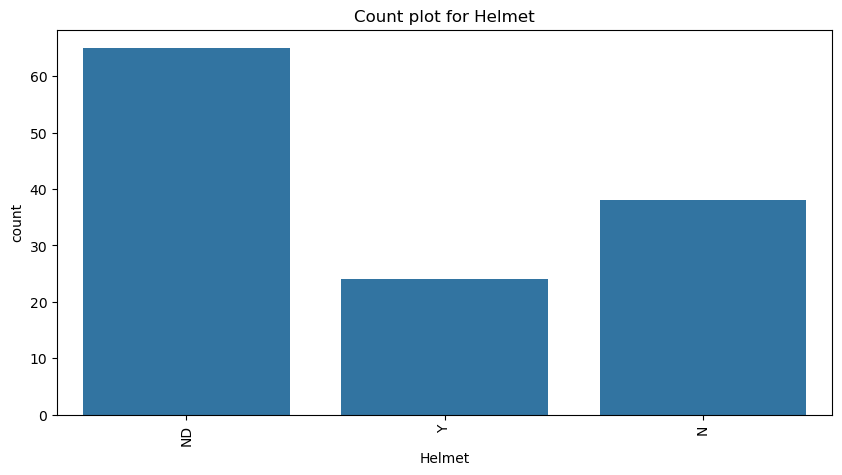

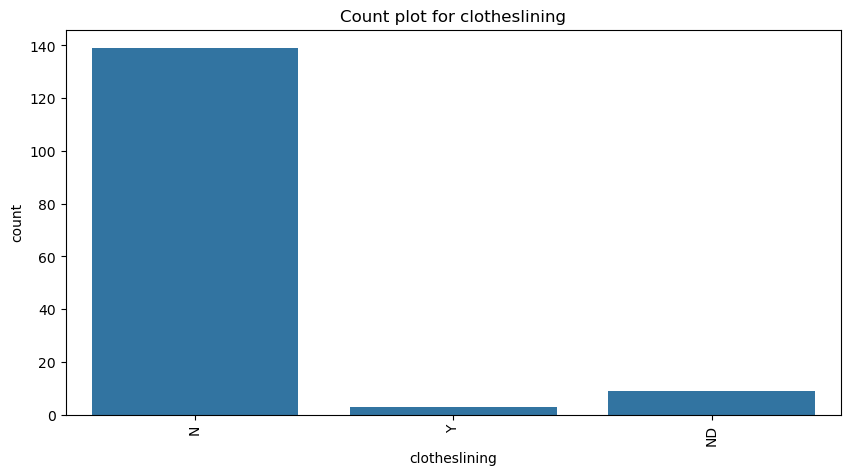

In [3]:
# Display the first few rows of the dataframe
print(kappa.head())

# Display basic statistics
print(kappa.describe(include='all'))

# Check for missing values
print(kappa.isnull().sum())

# Plot histograms for numerical columns
kappa.hist(figsize=(20, 15))
plt.show()

# Plot count plots for categorical columns
categorical_columns = kappa.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=kappa, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Count plot for {column}')
    plt.show()

In [4]:
missing_values = kappa.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values / len(kappa)) * 100
print(missing_values_percentage)

SITE                          0
CaseID                        0
ControlType                   0
StudySubjectID                0
PtAmbulatoryPriorArrival      0
                           ... 
ShakenBabySyndrome            0
FallFromElevation           323
FallDownStairs              357
Helmet                      238
clotheslining               214
Length: 124, dtype: int64
SITE                         0.000000
CaseID                       0.000000
ControlType                  0.000000
StudySubjectID               0.000000
PtAmbulatoryPriorArrival     0.000000
                              ...    
ShakenBabySyndrome           0.000000
FallFromElevation           88.493151
FallDownStairs              97.808219
Helmet                      65.205479
clotheslining               58.630137
Length: 124, dtype: float64


In [5]:
# Fill missing values for numerical columns with the mean
numerical_columns = kappa.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    kappa[column].fillna(kappa[column].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns = kappa.select_dtypes(include=['object']).columns
for column in categorical_columns:
    kappa[column].fillna(kappa[column].mode()[0], inplace=True)

# Verify that there are no missing values left
print(kappa.isnull().sum())

SITE                        0
CaseID                      0
ControlType                 0
StudySubjectID              0
PtAmbulatoryPriorArrival    0
                           ..
ShakenBabySyndrome          0
FallFromElevation           0
FallDownStairs              0
Helmet                      0
clotheslining               0
Length: 124, dtype: int64


   SITE  CaseID ControlType  StudySubjectID  FormOff BodyAsAWhole  \
0     1  110001        case          110001        0            N   
1     1  110002        case          110002        1          NaN   
2     1  110003        case          110003        0            N   
3     1  110004        case          110004        1          NaN   
4     1  110005        case          110005        0            N   

   BodyAsAWhole0  BodyAsAWhole1  BodyAsAWhole2  BodyAsAWhole3  ...  \
0              0              0              0              0  ...   
1              0              0              0              0  ...   
2              0              0              0              0  ...   
3              0              0              0              0  ...   
4              0              0              0              0  ...   

   Endocrinological  Endocrinological1  Endocrinological2 DermatologicalSkin  \
0                 N                  0                  0                  N   
1   

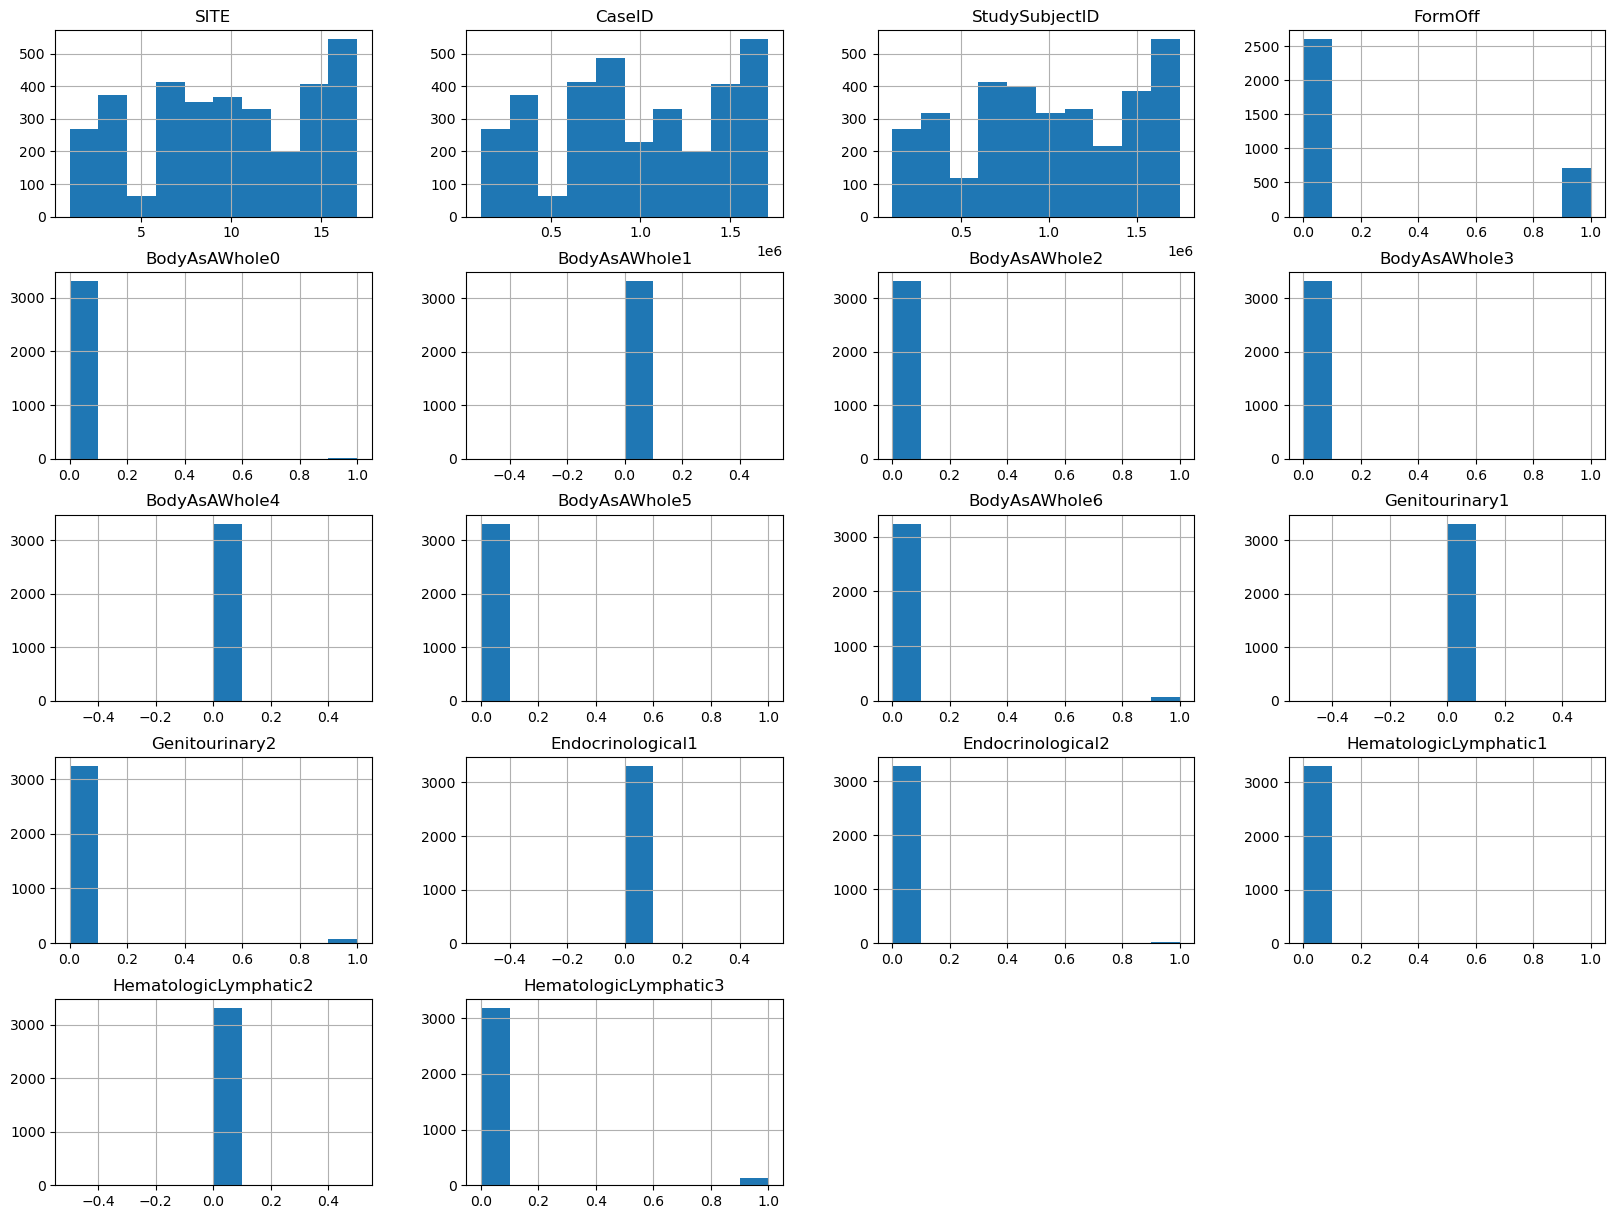

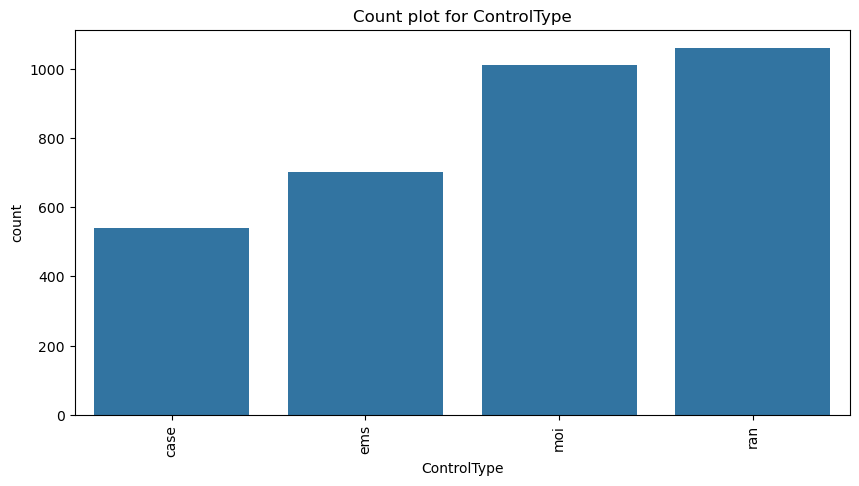

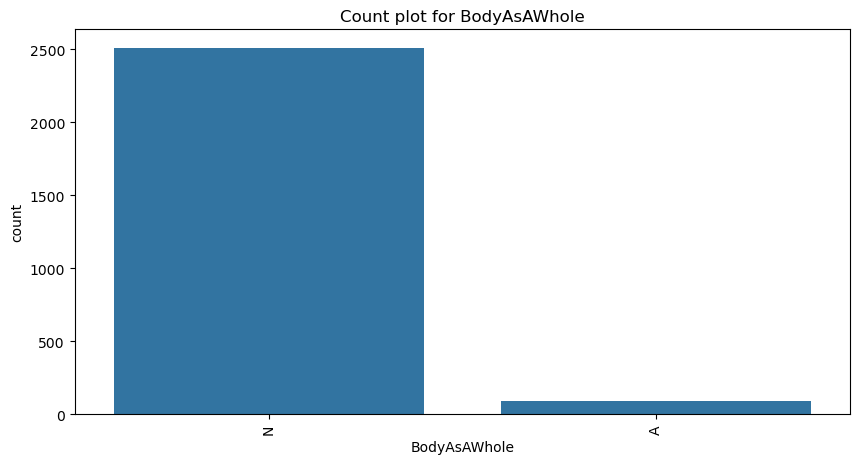

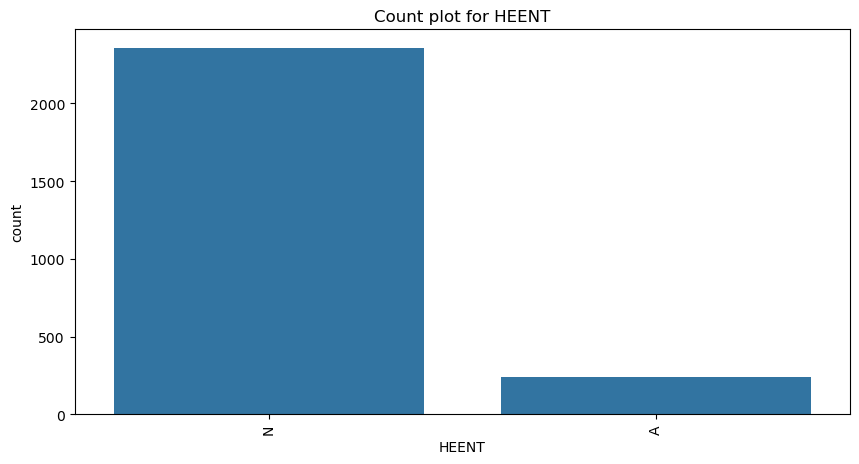

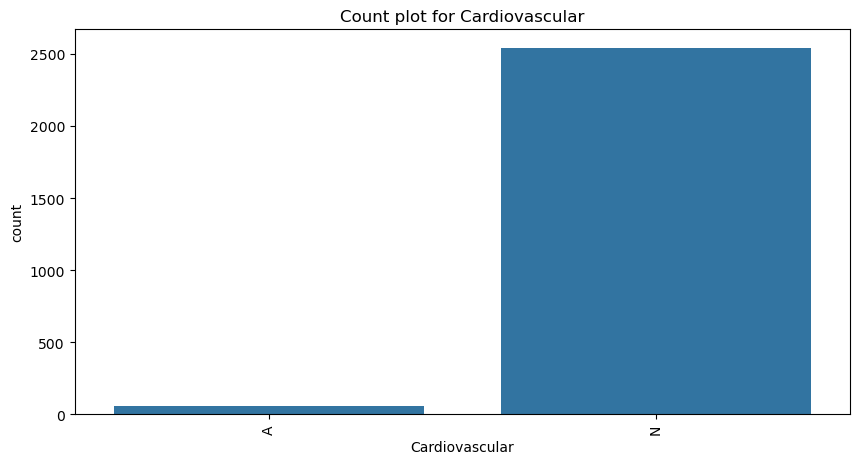

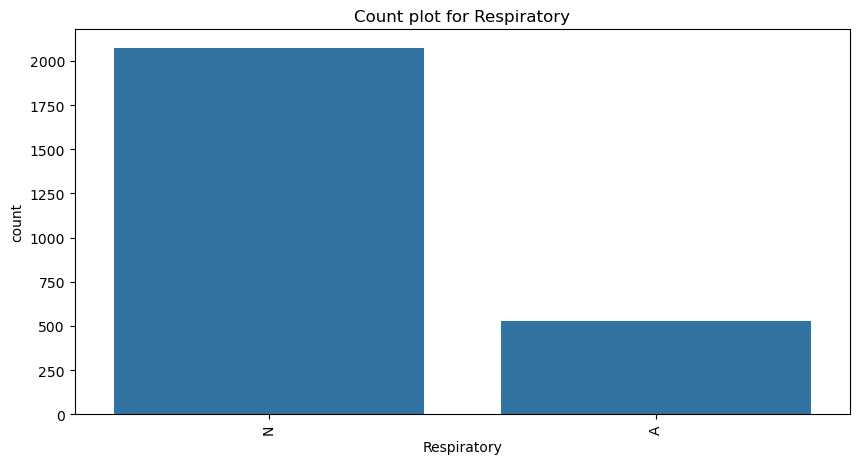

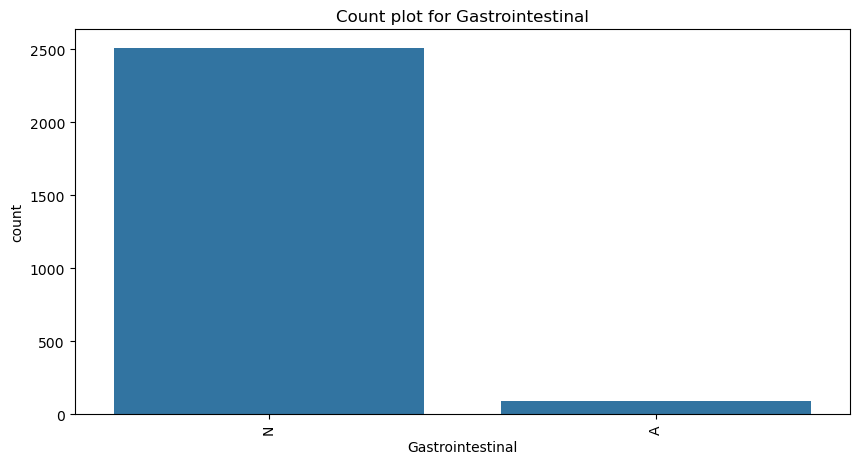

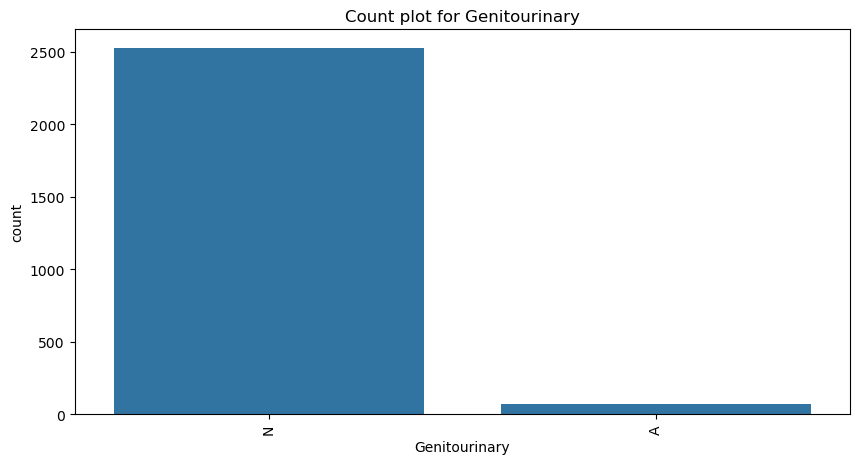

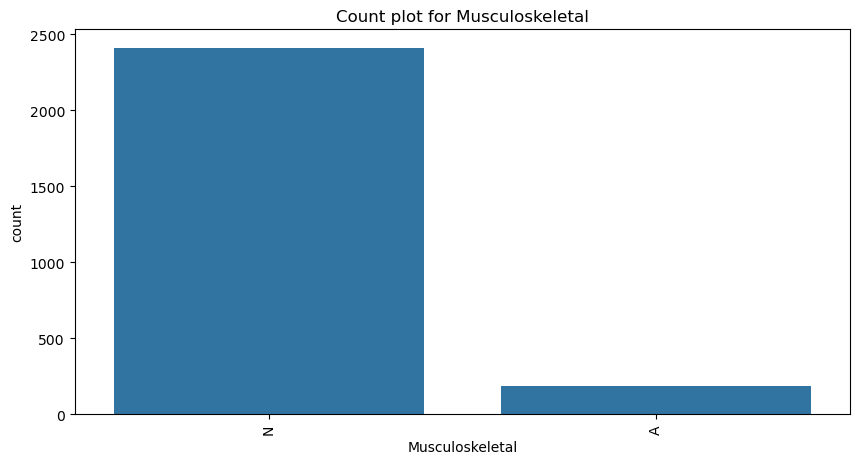

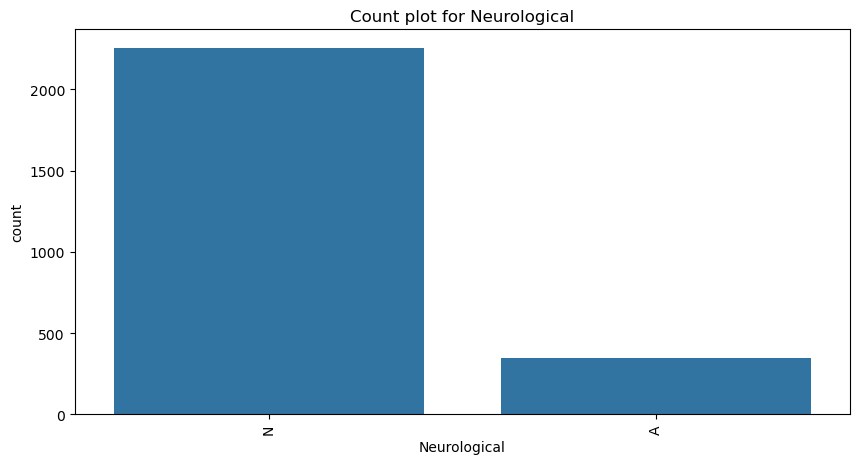

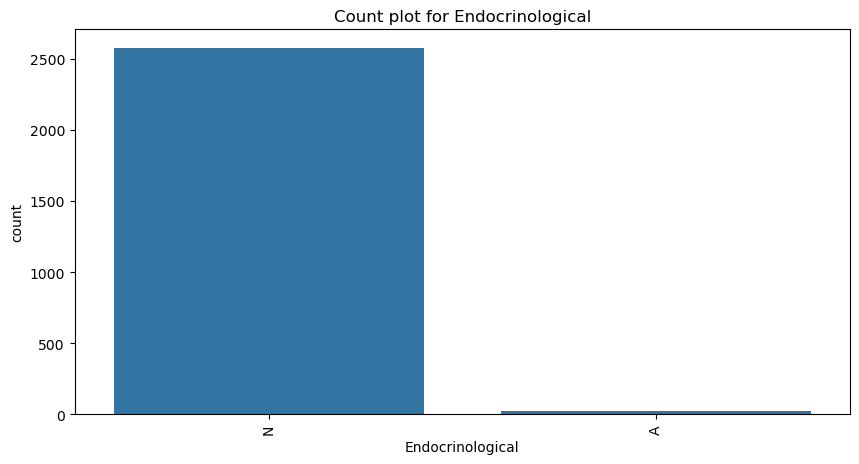

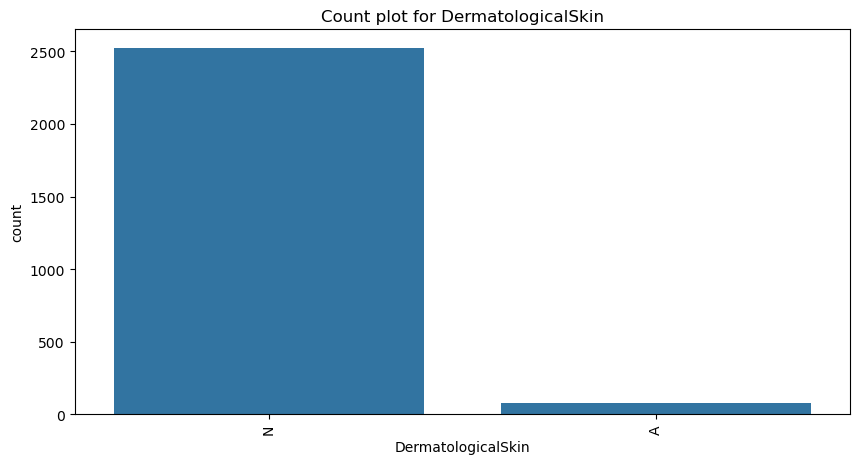

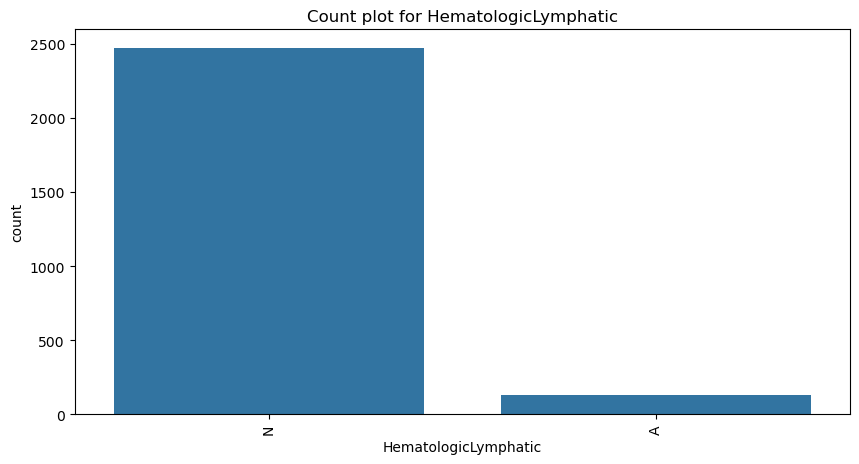

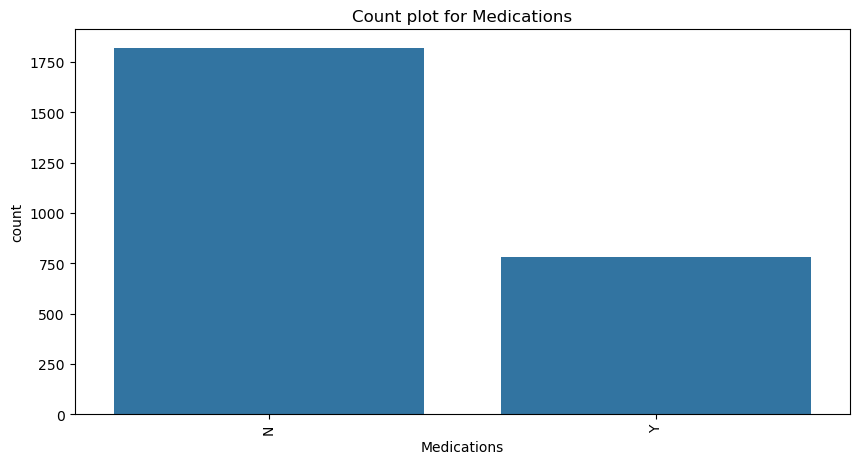

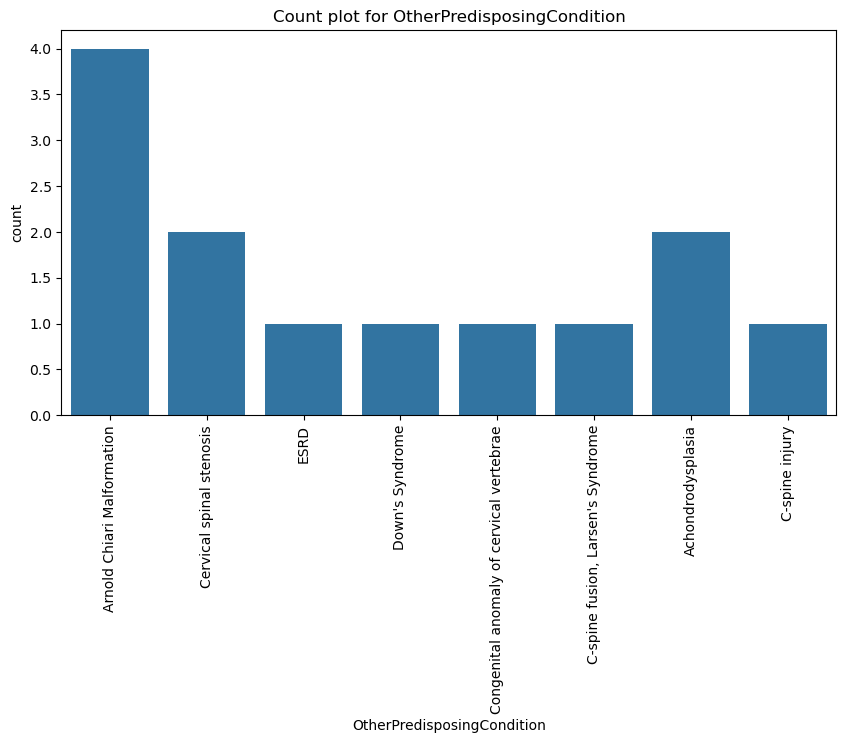

In [6]:
# Display the first few rows of the dataframe
print(medicalhistory.head())

# Display basic statistics
print(medicalhistory.describe(include='all'))

# Check for missing values
print(medicalhistory.isnull().sum())

# Plot histograms for numerical columns
medicalhistory.select_dtypes(include=['int64', 'float64']).hist(figsize=(20, 15))
plt.show()

# Plot count plots for categorical columns
categorical_columns_medicalhistory = medicalhistory.select_dtypes(include=['object']).columns
for column in categorical_columns_medicalhistory:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=medicalhistory, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Count plot for {column}')
    plt.show()

In [7]:
# Check for missing values in the medicalhistory dataframe
missing_values_medicalhistory = medicalhistory.isnull().sum()
print(missing_values_medicalhistory)
missing_values_percentage_medicalhistory = (missing_values_medicalhistory / len(medicalhistory)) * 100
print(missing_values_percentage_medicalhistory)

SITE                             0
CaseID                           0
ControlType                      0
StudySubjectID                   0
FormOff                          0
BodyAsAWhole                   712
BodyAsAWhole0                    0
BodyAsAWhole1                    0
BodyAsAWhole2                    0
BodyAsAWhole3                    0
BodyAsAWhole4                    0
BodyAsAWhole5                    0
BodyAsAWhole6                    0
HEENT                          712
Cardiovascular                 712
Respiratory                    712
Gastrointestinal               712
Genitourinary                  712
Genitourinary1                   0
Genitourinary2                   0
Musculoskeletal                712
Neurological                   712
Endocrinological               712
Endocrinological1                0
Endocrinological2                0
DermatologicalSkin             712
HematologicLymphatic           712
HematologicLymphatic1            0
HematologicLymphatic

In [8]:
# Fill missing values for numerical columns with the mean
numerical_columns_injurymechanism = injurymechanism.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns_injurymechanism:
    injurymechanism[column].fillna(injurymechanism[column].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns_injurymechanism = injurymechanism.select_dtypes(include=['object']).columns
for column in categorical_columns_injurymechanism:
    injurymechanism[column].fillna(injurymechanism[column].mode()[0], inplace=True)

# Verify that there are no missing values left
print(injurymechanism.isnull().sum())

SITE                         0
CaseID                       0
ControlType                  0
StudySubjectID               0
injurydate                   0
InjuryDateND                 0
InjuryTime                   0
InjuryTimeND                 0
EstimateTimeInjury           0
ICD9MechInjury1              0
ICD9MechInjury2              0
ICD9MechInjury3              0
ICD9Location1                0
ICD9Location2                0
ICD9Location3                0
InjuryPrimaryMechanism       0
InjuryPrimaryMechanismtxt    0
MVCREC                       0
MVCHOC                       0
MVCSI                        0
MVCRO                        0
MVCEFA                       0
MVCDSC                       0
MVCSpeed                     0
PassRestraint                0
OMTSpeed                     0
Assault                      0
ChildAbuse                   0
ShakenBabySyndrome           0
FallFromElevation            0
FallDownStairs               0
clotheslining                0
helmet  

   SITE  CaseID ControlType  StudySubjectID  injurydate  InjuryDateND  \
0     1  110001        case          110001    1/1/2000             0   
1     1  110002        case          110002    1/1/2000             0   
2     1  110003        case          110003    1/1/2000             0   
3     1  110004        case          110004  12/28/1999             0   
4     1  110005        case          110005  12/30/1999             0   

  InjuryTime  InjuryTimeND EstimateTimeInjury ICD9MechInjury1  ...  OMTSpeed  \
0      16:00             1                  6          E884.9  ...  1.444444   
1      16:00             1                  4          E812.1  ...  1.444444   
2      16:00             1                  5          E883.0  ...  1.444444   
3      16:00             1                  U          E812.1  ...  1.444444   
4      11:50             0                  5          E812.1  ...  1.444444   

    Assault ChildAbuse ShakenBabySyndrome FallFromElevation FallDownStairs  \
0 

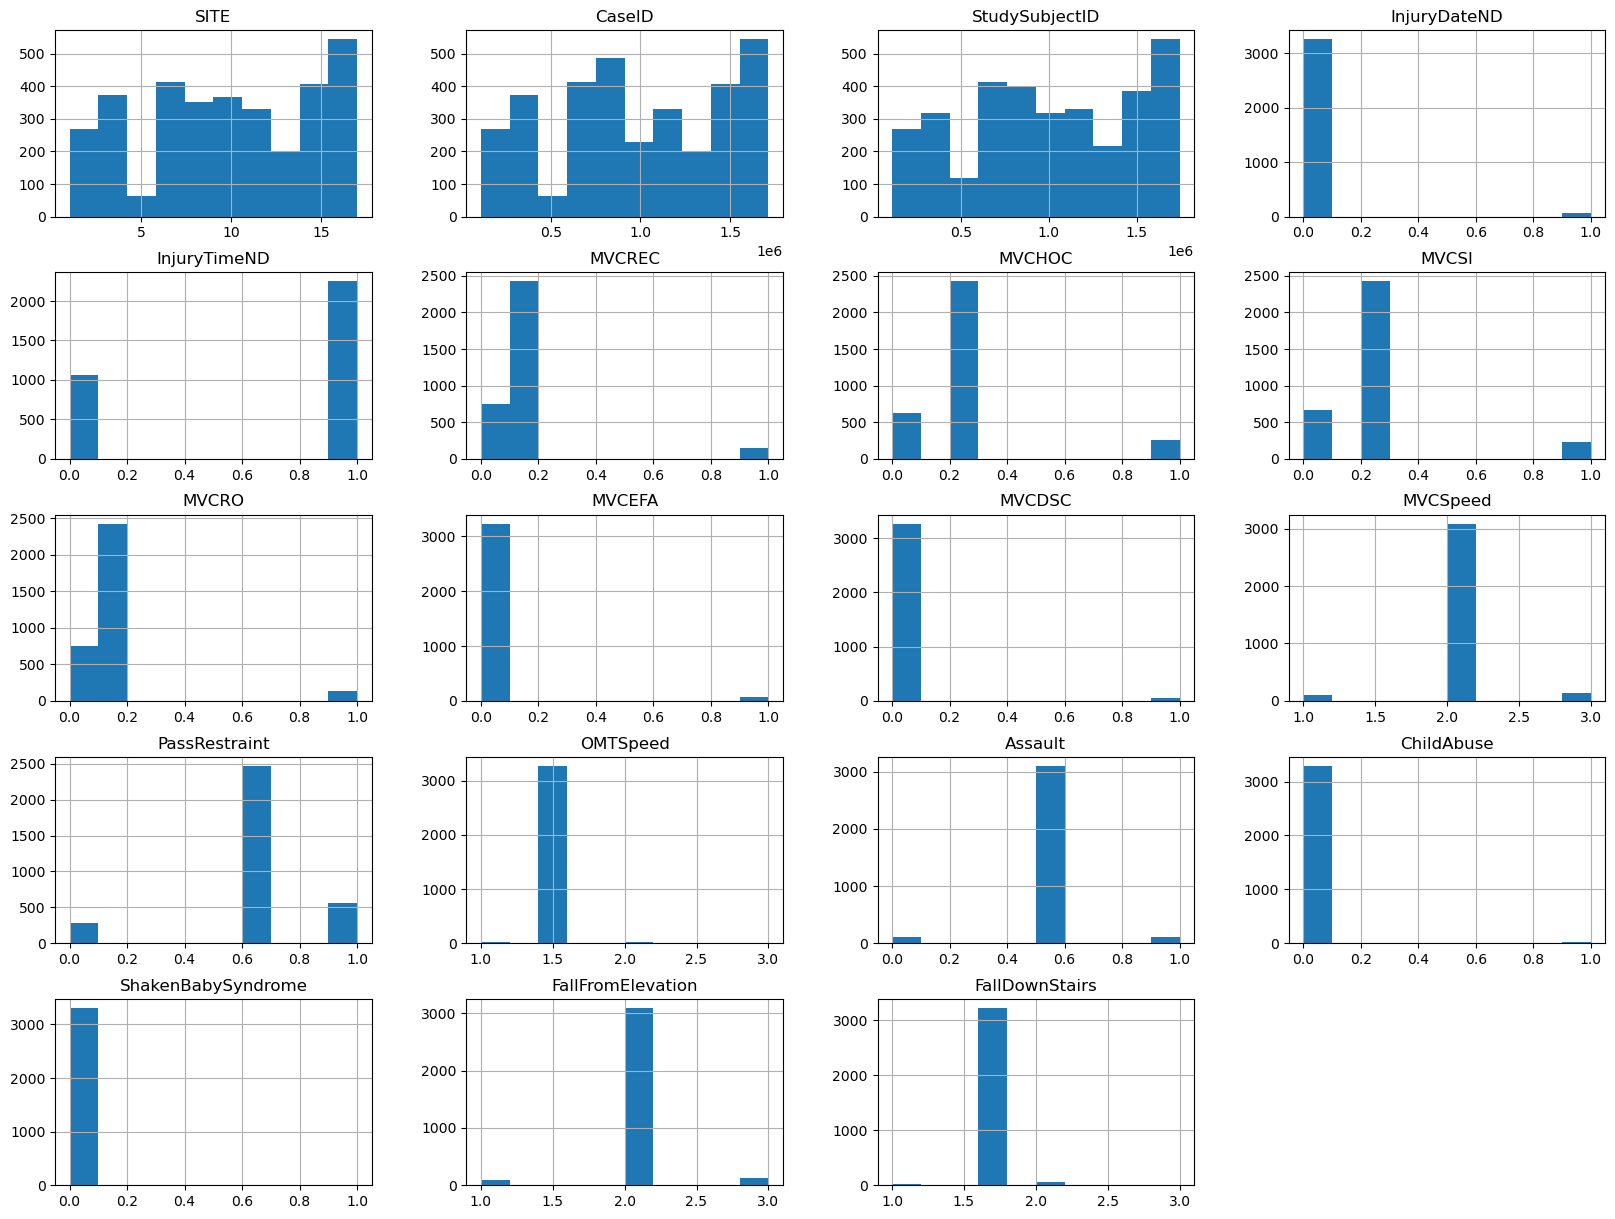

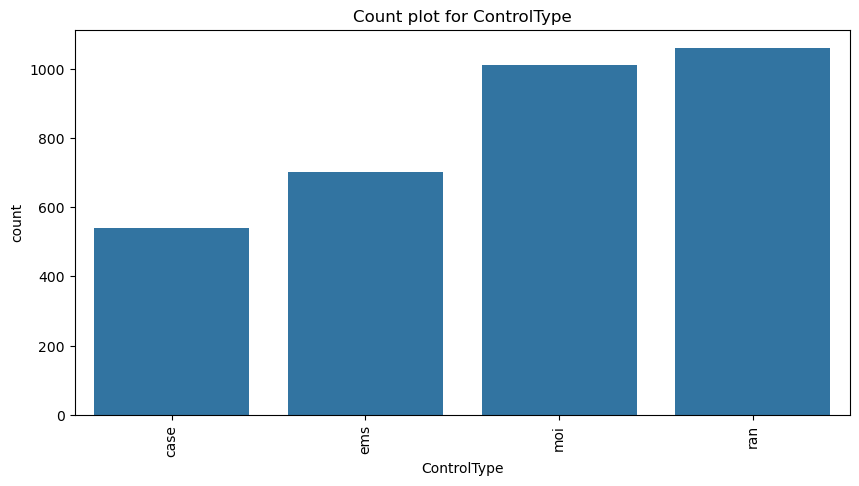

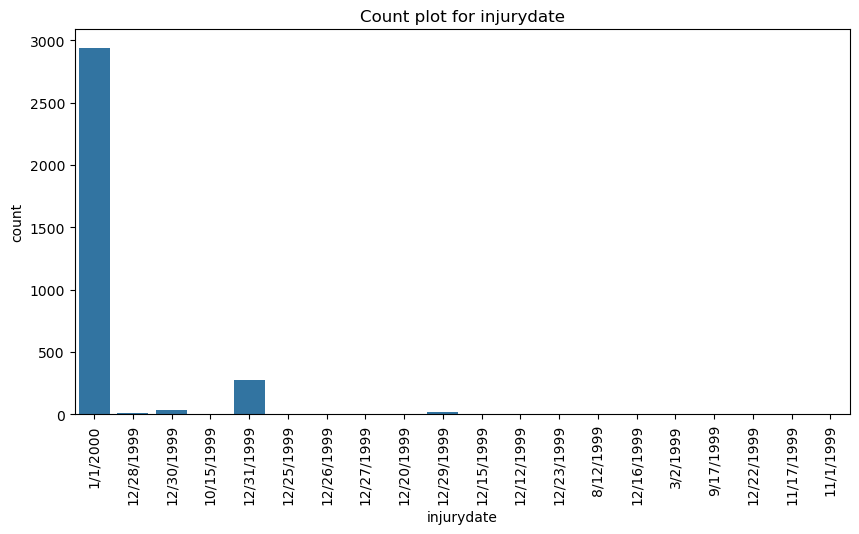

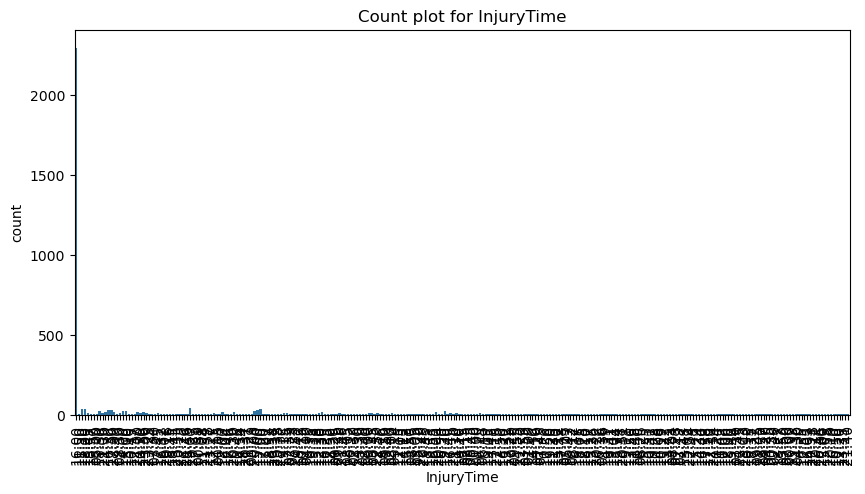

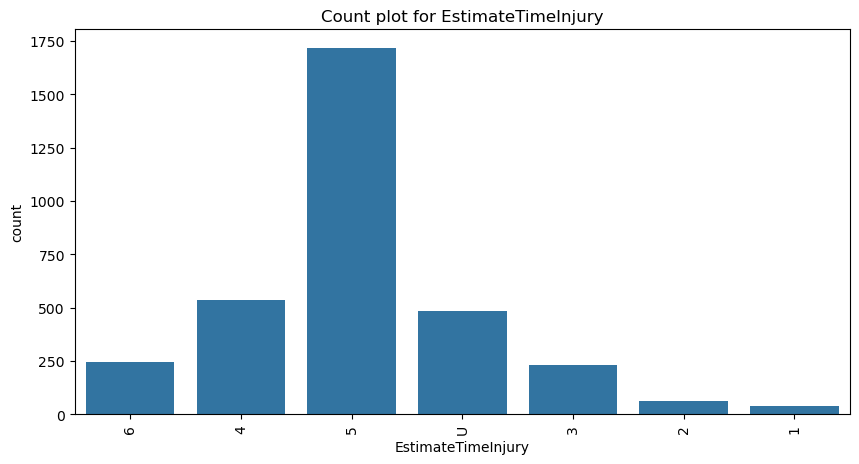

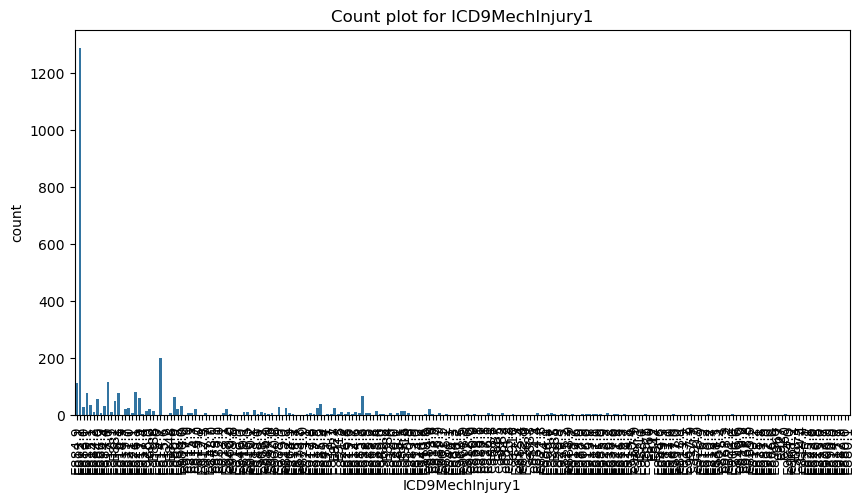

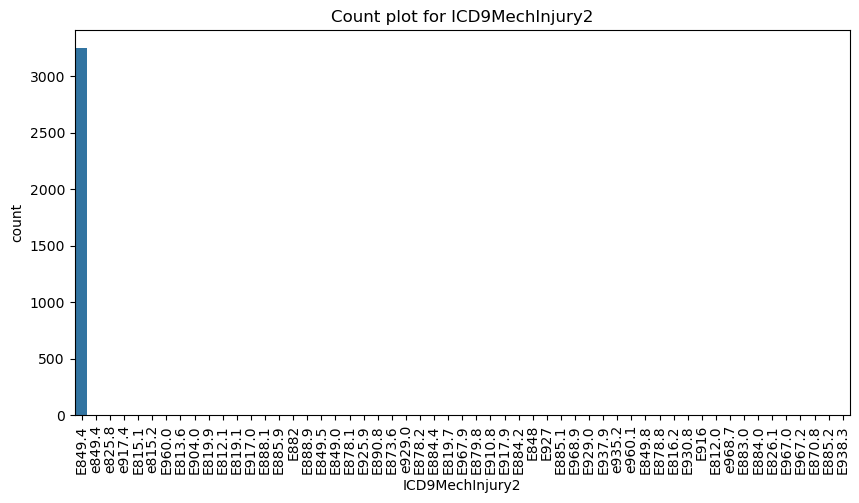

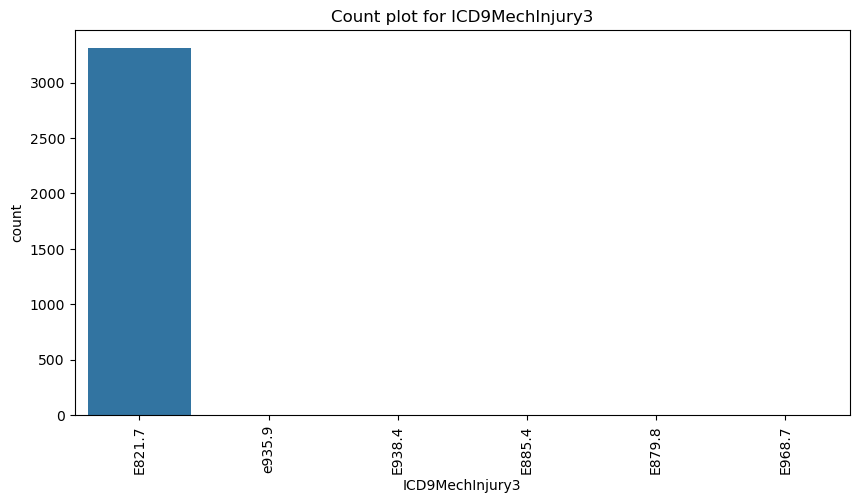

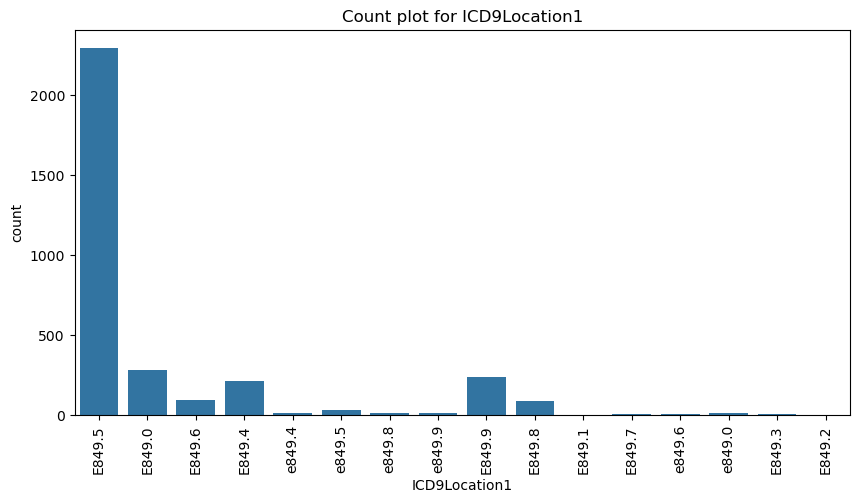

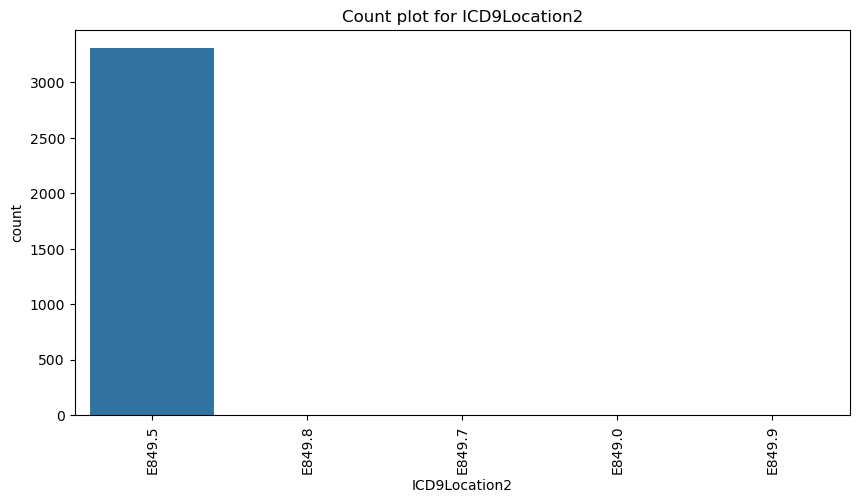

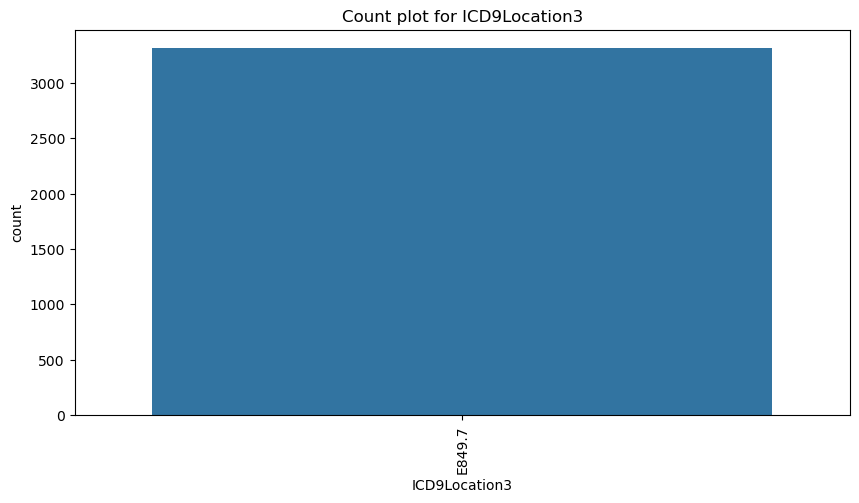

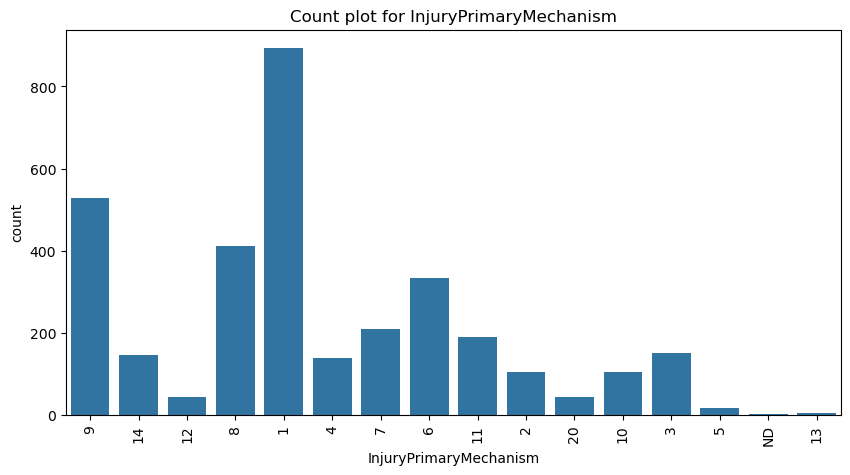

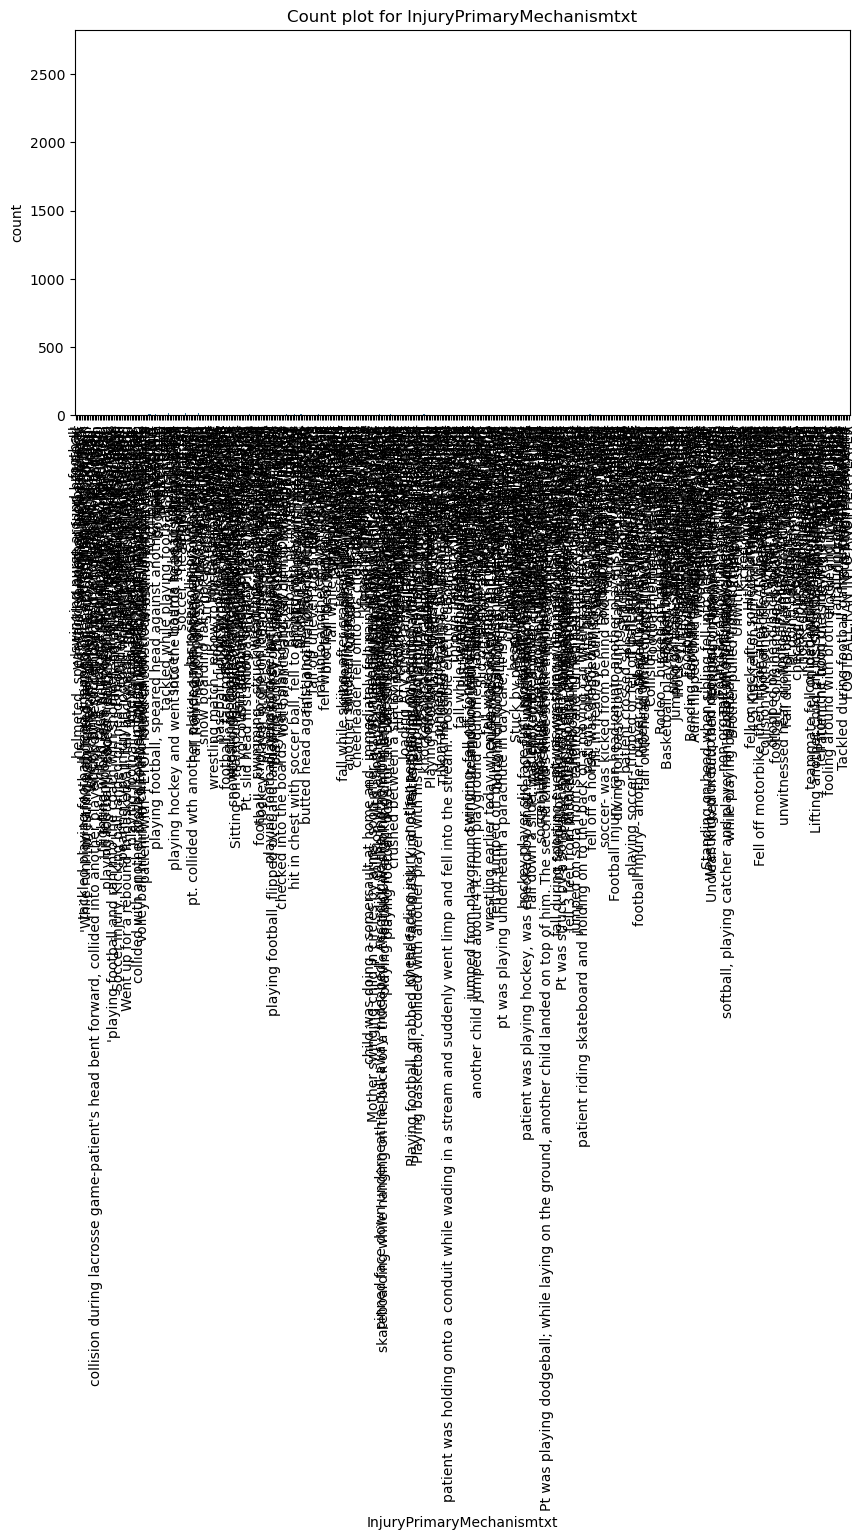

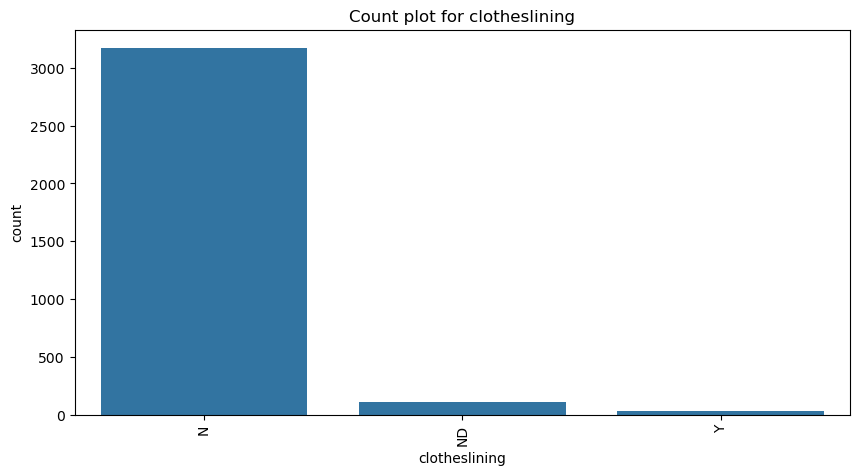

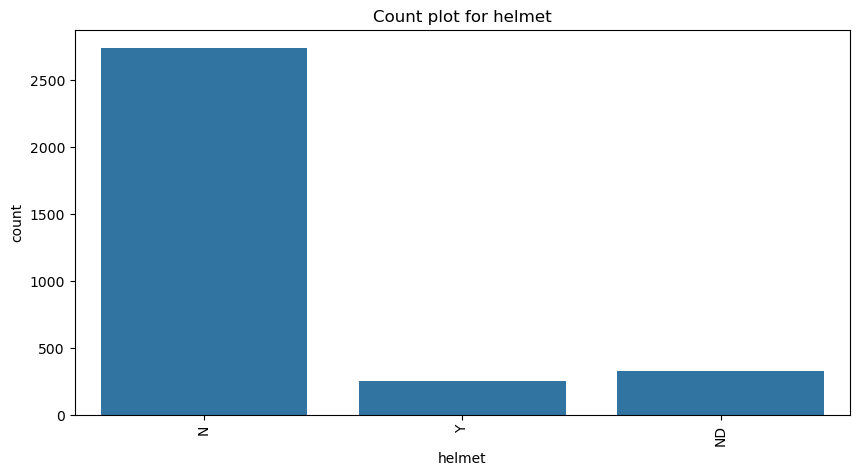

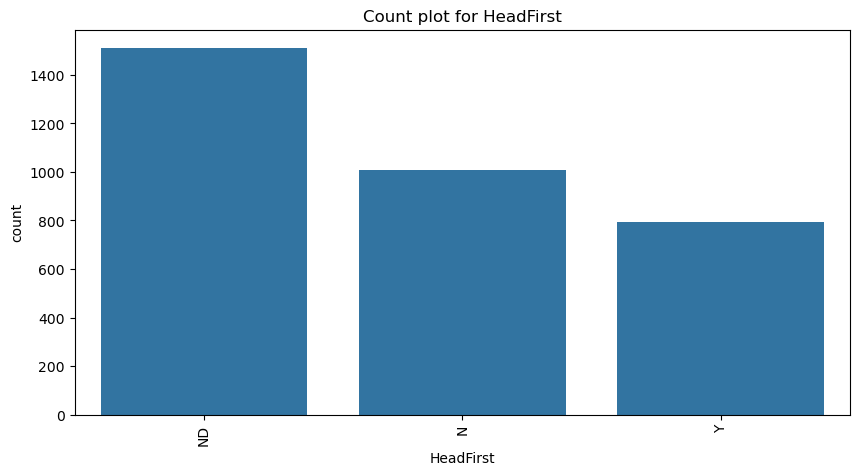

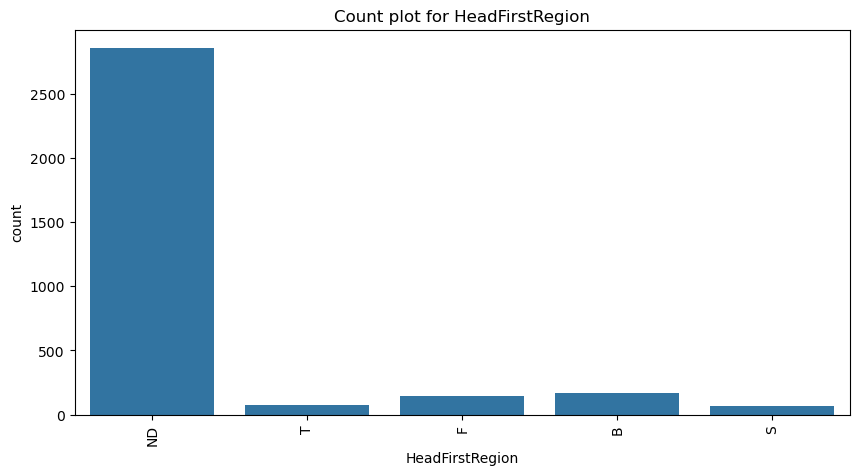

In [9]:
# Display the first few rows of the dataframe
print(injurymechanism.head())

# Display basic statistics
print(injurymechanism.describe(include='all'))

# Check for missing values
print(injurymechanism.isnull().sum())

# Plot histograms for numerical columns
injurymechanism.select_dtypes(include=['int64', 'float64']).hist(figsize=(20, 15))
plt.show()

# Plot count plots for categorical columns
categorical_columns_injurymechanism = injurymechanism.select_dtypes(include=['object']).columns
for column in categorical_columns_injurymechanism:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=injurymechanism, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Count plot for {column}')
    plt.show()

In [10]:
# Check for missing values in the injurymechanism dataframe
missing_values_injurymechanism = injurymechanism.isnull().sum()
print(missing_values_injurymechanism)
missing_values_percentage_injurymechanism = (missing_values_injurymechanism / len(injurymechanism)) * 100
print(missing_values_percentage_injurymechanism)

SITE                         0
CaseID                       0
ControlType                  0
StudySubjectID               0
injurydate                   0
InjuryDateND                 0
InjuryTime                   0
InjuryTimeND                 0
EstimateTimeInjury           0
ICD9MechInjury1              0
ICD9MechInjury2              0
ICD9MechInjury3              0
ICD9Location1                0
ICD9Location2                0
ICD9Location3                0
InjuryPrimaryMechanism       0
InjuryPrimaryMechanismtxt    0
MVCREC                       0
MVCHOC                       0
MVCSI                        0
MVCRO                        0
MVCEFA                       0
MVCDSC                       0
MVCSpeed                     0
PassRestraint                0
OMTSpeed                     0
Assault                      0
ChildAbuse                   0
ShakenBabySyndrome           0
FallFromElevation            0
FallDownStairs               0
clotheslining                0
helmet  